In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

# First Dataset

## Data Loading and Initial Analysis

In [ ]:
# Load the dataset
data_path = 'FB_Data.csv'
data = pd.read_csv(data_path)

# Display the first few rows
data.head()

,Page Name,Beginning Of Interval,Page Likes,Page Like Growth,Followers,Follower Growth,Post Count,Total Interactions,Interaction Growth,Interaction Rate,...,Link Interaction Rate,Status Posts,Status Interactions,Status Interaction Rate,Facebook Video Posts (excluding Live),Facebook Video Interactions (excluding Live),Facebook Video Interaction Rate (excluding Live),Facebook Live Video Posts,Facebook Live Interactions,Facebook Live Interaction Rate
0,Facebook 360,7/1/2022 0:00,3409879,0.01%,3511083,0%,0,0,0%,0%,...,NaN,0,0,NaN,0,0,NaN,0,0,NaN
1,Facebook 360,8/1/2022 0:00,3412371,0.07%,3513214,0.06%,0,0,0%,0%,...,NaN,0,0,NaN,0,0,NaN,0,0,NaN
2,Facebook 360,9/1/2022 0:00,3417007,0.14%,3517468,0.12%,0,0,0%,0%,...,NaN,0,0,NaN,0,0,NaN,0,0,NaN
3,Facebook 360,10/1/2022 0:00,3416259,-0.02%,3516222,-0.04%,0,0,0%,0%,...,NaN,0,0,NaN,0,0,NaN,0,0,NaN
4,Facebook 360,11/1/2022 0:00,3413752,-0.07%,3513191,-0.09%,0,0,0%,0%,...,NaN,0,0,NaN,0,0,NaN,0,0,NaN


## Data Cleaning

In [ ]:
# Convert 'Beginning Of Interval' to datetime
data['Beginning Of Interval'] = pd.to_datetime(data['Beginning Of Interval'])

# Handling missing values and converting data types for interaction rates
rate_columns = ['Interaction Rate', 'Interactions Per Post', 'Photo Interaction Rate',
                'Link Interaction Rate', 'Status Interaction Rate',
                'Facebook Video Interaction Rate (excluding Live)', 'Facebook Live Interaction Rate']

for col in rate_columns:
    data[col] = pd.to_numeric(data[col].str.replace('%', '').str.replace(',', ''), errors='coerce').fillna(0)


## Exploratory Data Analysis

**Numerical Columns:**
- Page Likes
- Followers
- Post Count
- Total Interactions
- Comments
- Shares
- Total Reactions (including Likes)
- Likes
- Angry
- Haha
- Wow
- Sad
- Love
- Photo Posts
- Photo Interactions
- Link Posts
- Link Interactions
- Status Posts
- Status Interactions
- Facebook Video Posts (excluding Live)
- Facebook Video Interactions (excluding Live)
- Facebook Live Video Posts
- Facebook Live Interactions
- Page Like Growth (expressed as a percentage)
- Interaction Growth (expressed as a percentage)
- Photo Interaction Rate
- Facebook Video Interaction Rate (excluding Live)

**Categorical Columns:**
- Page Name
- Beginning Of Interval (date can be treated categorically or as a time series depending on analysis)
- Follower Growth
- Interaction Rate
- Interactions Per Post
- Link Interaction Rate
- Status Interaction Rate
- Facebook Live Interaction Rate

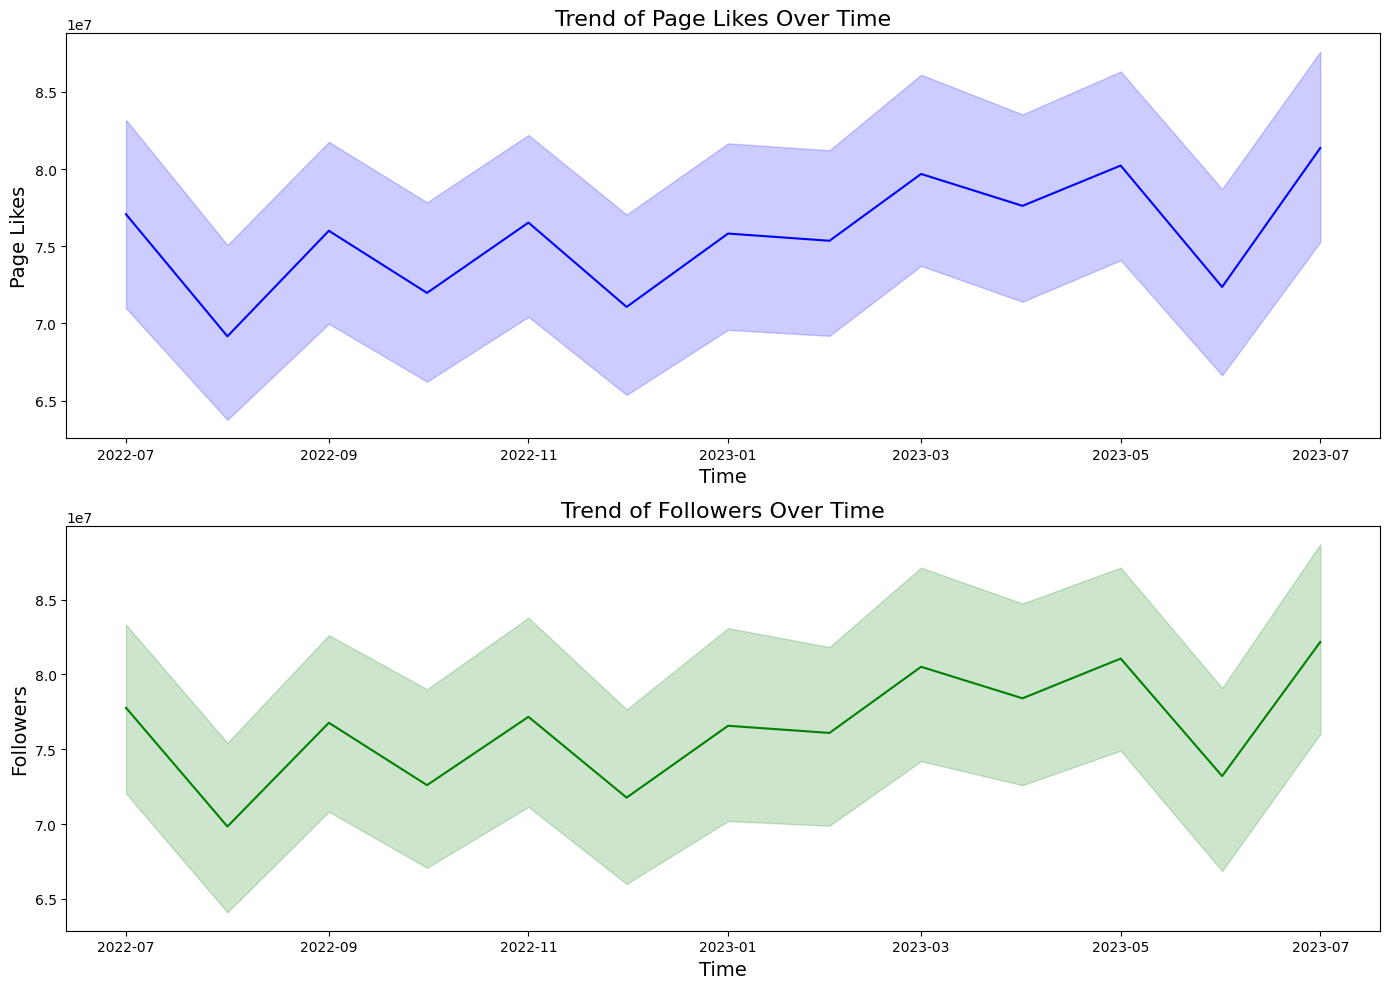

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trend Analysis for Page Likes and Followers over Time
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plotting Page Likes Over Time
sns.lineplot(data=data, x='Beginning Of Interval', y='Page Likes', ax=ax[0], color='blue')
ax[0].set_title('Trend of Page Likes Over Time', fontsize=16)
ax[0].set_xlabel('Time', fontsize=14)
ax[0].set_ylabel('Page Likes', fontsize=14)

# Plotting Followers Over Time
sns.lineplot(data=data, x='Beginning Of Interval', y='Followers', ax=ax[1], color='green')
ax[1].set_title('Trend of Followers Over Time', fontsize=16)
ax[1].set_xlabel('Time', fontsize=14)
ax[1].set_ylabel('Followers', fontsize=14)

plt.tight_layout()
plt.show()


## Detailed Description of the Data

In [ ]:
# Display the data types of each column
data_types = data.dtypes
data_types

Page Name                                           object
Beginning Of Interval                               object
Page Likes                                           int64
Page Like Growth                                    object
Followers                                            int64
Follower Growth                                     object
Post Count                                           int64
Total Interactions                                   int64
Interaction Growth                                  object
Interactions Per Post                               object
Comments                                             int64
Shares                                               int64
Total Reactions (including Likes)                    int64
Likes                                                int64
Angry                                                int64
Haha                                                 int64
Wow                                                  int

## Statistics of the Data

In [ ]:

# Basic statistics for numerical columns
statistics = data.describe()

statistics


,Beginning Of Interval,Page Likes,Followers,Post Count,Total Interactions,Interaction Rate,Interactions Per Post,Comments,Shares,Total Reactions (including Likes),...,Link Interaction Rate,Status Posts,Status Interactions,Status Interaction Rate,Facebook Video Posts (excluding Live),Facebook Video Interactions (excluding Live),Facebook Video Interaction Rate (excluding Live),Facebook Live Video Posts,Facebook Live Interactions,Facebook Live Interaction Rate
count,10000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2023-01-01 03:40:10.559999744,7.569596e+07,7.644051e+07,3.36910,7068.761500,0.047601,1726.663484,1996.939200,287.225800,4784.596500,...,0.001715,0.193300,1457.789400,0.004408,1.494700,2297.523300,0.040530,0.258800,1392.782800,0.057750
min,2022-07-01 00:00:00,6.614000e+03,8.224000e+03,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-10-01 00:00:00,1.239336e+06,1.297393e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-01-01 00:00:00,1.874890e+07,1.894655e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-04-01 00:00:00,1.780095e+08,1.793908e+08,3.00000,3009.000000,0.000000,382.780000,570.000000,103.000000,2150.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,316.000000,0.000000,0.000000,0.000000,0.000000
max,2023-07-01 00:00:00,1.832014e+08,1.884275e+08,81.00000,217131.000000,0.980000,99830.500000,84153.000000,11280.000000,154956.000000,...,0.210000,9.000000,199661.000000,0.240000,34.000000,83934.000000,1.210000,14.000000,119044.000000,6.280000
std,NaN,8.497998e+07,8.521433e+07,8.63007,25961.850698,0.157829,8505.988097,8343.294559,1044.817009,17289.584382,...,0.017751,0.969138,15666.538614,0.025469,4.382019,9581.017391,0.149638,1.265378,10126.377146,0.527141


## Null Values Analysis

In [ ]:
# Count of null values in each column
null_values = data.isnull().sum()
null_values[null_values > 0]

Series([], dtype: int64)

## Univariate Analysis

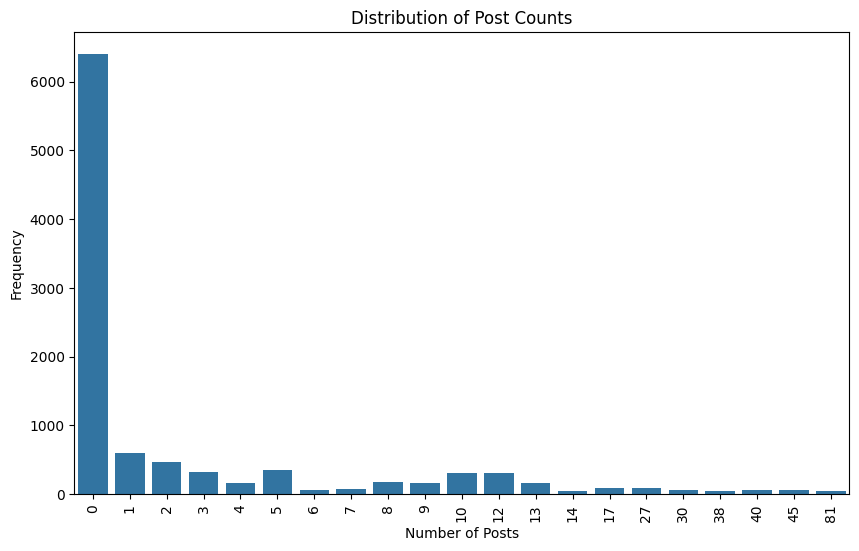

In [ ]:
# Univariate Analysis: Distribution of Post Counts
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Post Count'])
plt.title('Distribution of Post Counts')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


## Bivariate Analysis

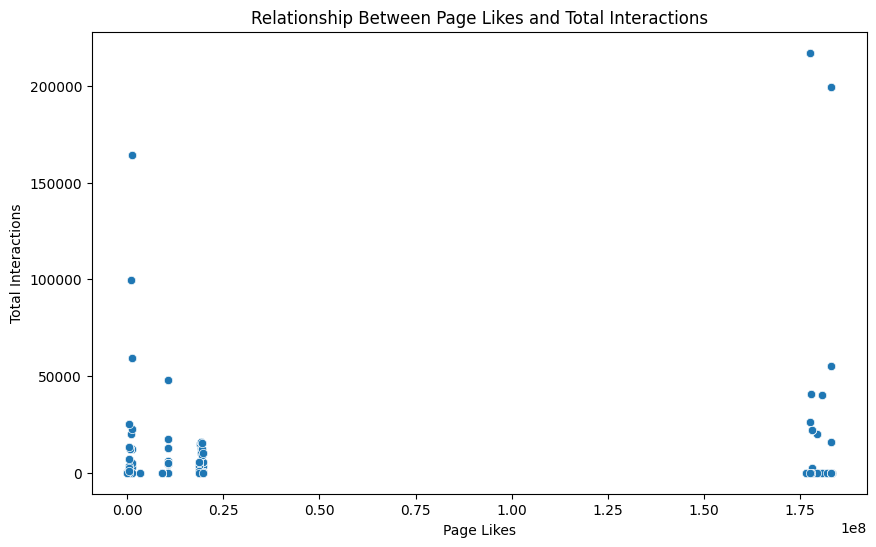

In [ ]:
# Bivariate Analysis: Relationship between Page Likes and Total Interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Page Likes', y='Total Interactions', data=data)
plt.title('Relationship Between Page Likes and Total Interactions')
plt.xlabel('Page Likes')
plt.ylabel('Total Interactions')
plt.show()

## Multivariate Analysis

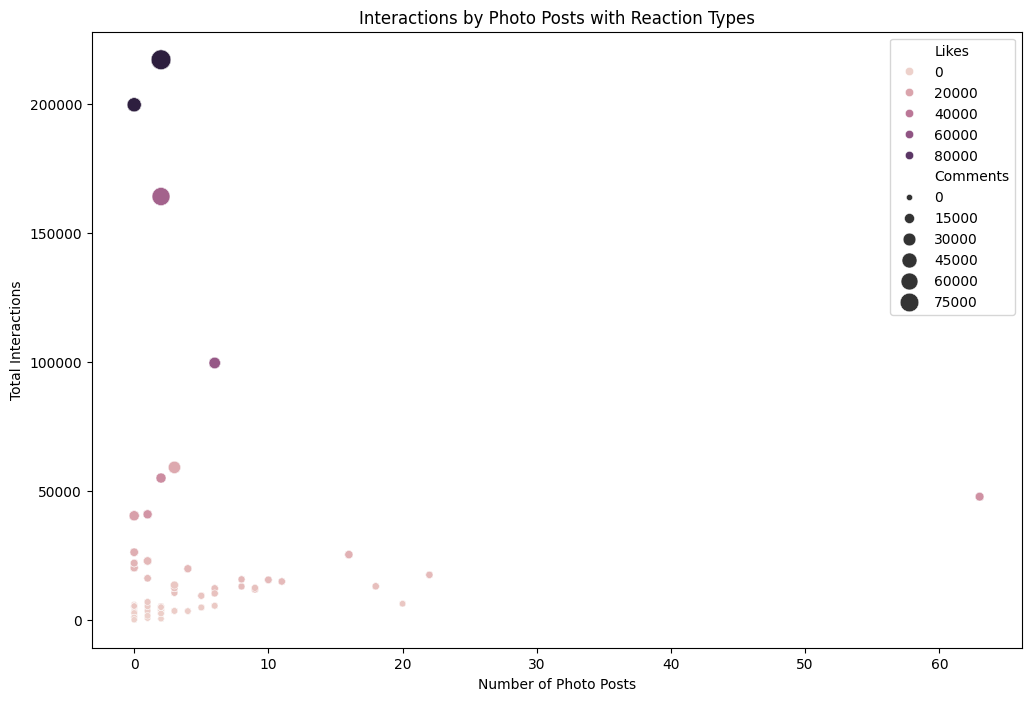

In [ ]:
# Multivariate Analysis: Interactions by Post Type and Reaction Type
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Photo Posts', y='Total Interactions', hue='Likes', size='Comments', sizes=(20, 200), data=data)
plt.title('Interactions by Photo Posts with Reaction Types')
plt.xlabel('Number of Photo Posts')
plt.ylabel('Total Interactions')
plt.show()

## Expanded Univariate Analysis

In [ ]:

# Distribution of various numerical and categorical features
fig, axes = plt.subplots(5, 2, figsize=(15, 22))
sns.histplot(data['Page Likes'], bins=30, ax=axes[0, 0])
sns.histplot(data['Followers'], bins=30, ax=axes[0, 1])
sns.countplot(data=data, x='Post Count', ax=axes[1, 0])
sns.countplot(data=data, x='Total Reactions (including Likes)', ax=axes[1, 1])
sns.countplot(data=data, x='Photo Posts', ax=axes[2, 0])
sns.countplot(data=data, x='Facebook Video Posts (excluding Live)', ax=axes[2, 1])
sns.countplot(data=data, x='Facebook Live Video Posts', ax=axes[3, 0])
sns.countplot(data=data, x='Comments', ax=axes[3, 1])
sns.countplot(data=data, x='Shares', ax=axes[4, 0])
sns.countplot(data=data, x='Likes', ax=axes[4, 1])

plt.tight_layout()
plt.show()


## Expanded Bivariate Analysis

In [ ]:

# Plotting relationships between several pairs of variables
fig, axes = plt.subplots(5, 2, figsize=(15, 22))
sns.scatterplot(x='Page Likes', y='Total Interactions', data=data, ax=axes[0, 0])
sns.scatterplot(x='Followers', y='Comments', data=data, ax=axes[0, 1])
sns.scatterplot(x='Post Count', y='Shares', data=data, ax=axes[1, 0])
sns.scatterplot(x='Total Reactions (including Likes)', y='Likes', data=data, ax=axes[1, 1])
sns.scatterplot(x='Photo Posts', y='Photo Interactions', data=data, ax=axes[2, 0])
sns.scatterplot(x='Video Posts (excluding Live)', y='Video Interactions (excluding Live)', data=data, ax=axes[2, 1])
sns.scatterplot(x='Facebook Live Video Posts', y='Facebook Live Interactions', data=data, ax=axes[3, 0])
sns.scatterplot(x='Comments', y='Shares', data=data, ax=axes[3, 1])
sns.scatterplot(x='Likes', y='Haha', data=data, ax=axes[4, 0])
sns.scatterplot(x='Page Likes', y='Followers', data=data, ax=axes[4, 1])

plt.tight_layout()
plt.show()


## Expanded Multivariate Analysis

In [ ]:

# Multivariate plots showing interactions among multiple variables
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(x='Page Likes', y='Total Interactions', hue='Post Count', size='Comments', data=data, ax=axes[0, 0])
sns.scatterplot(x='Followers', y='Total Reactions (including Likes)', hue='Photo Posts', size='Photo Interactions', data=data, ax=axes[0, 1])
sns.scatterplot(x='Video Posts (excluding Live)', y='Video Interactions (excluding Live)', hue='Likes', size='Haha', data=data, ax=axes[1, 0])
sns.scatterplot(x='Facebook Live Video Posts', y='Facebook Live Interactions', hue='Shares', size='Angry', data=data, ax=axes[1, 1])

plt.tight_layout()
plt.show()


## Detailed Engagement Analysis

In [ ]:
data.columns

Index(['Page Name', 'Beginning Of Interval', 'Page Likes', 'Page Like Growth',
       'Followers', 'Follower Growth', 'Post Count', 'Total Interactions',
       'Interaction Growth', 'Interaction Rate', 'Interactions Per Post',
       'Comments', 'Shares', 'Total Reactions (including Likes)', 'Likes',
       'Angry', 'Haha', 'Wow', 'Sad', 'Love', 'Photo Posts',
       'Photo Interactions', 'Photo Interaction Rate', 'Link Posts',
       'Link Interactions', 'Link Interaction Rate', 'Status Posts',
       'Status Interactions', 'Status Interaction Rate',
       'Facebook Video Posts (excluding Live)',
       'Facebook Video Interactions (excluding Live)',
       'Facebook Video Interaction Rate (excluding Live)',
       'Facebook Live Video Posts', 'Facebook Live Interactions',
       'Facebook Live Interaction Rate'],
      dtype='object')

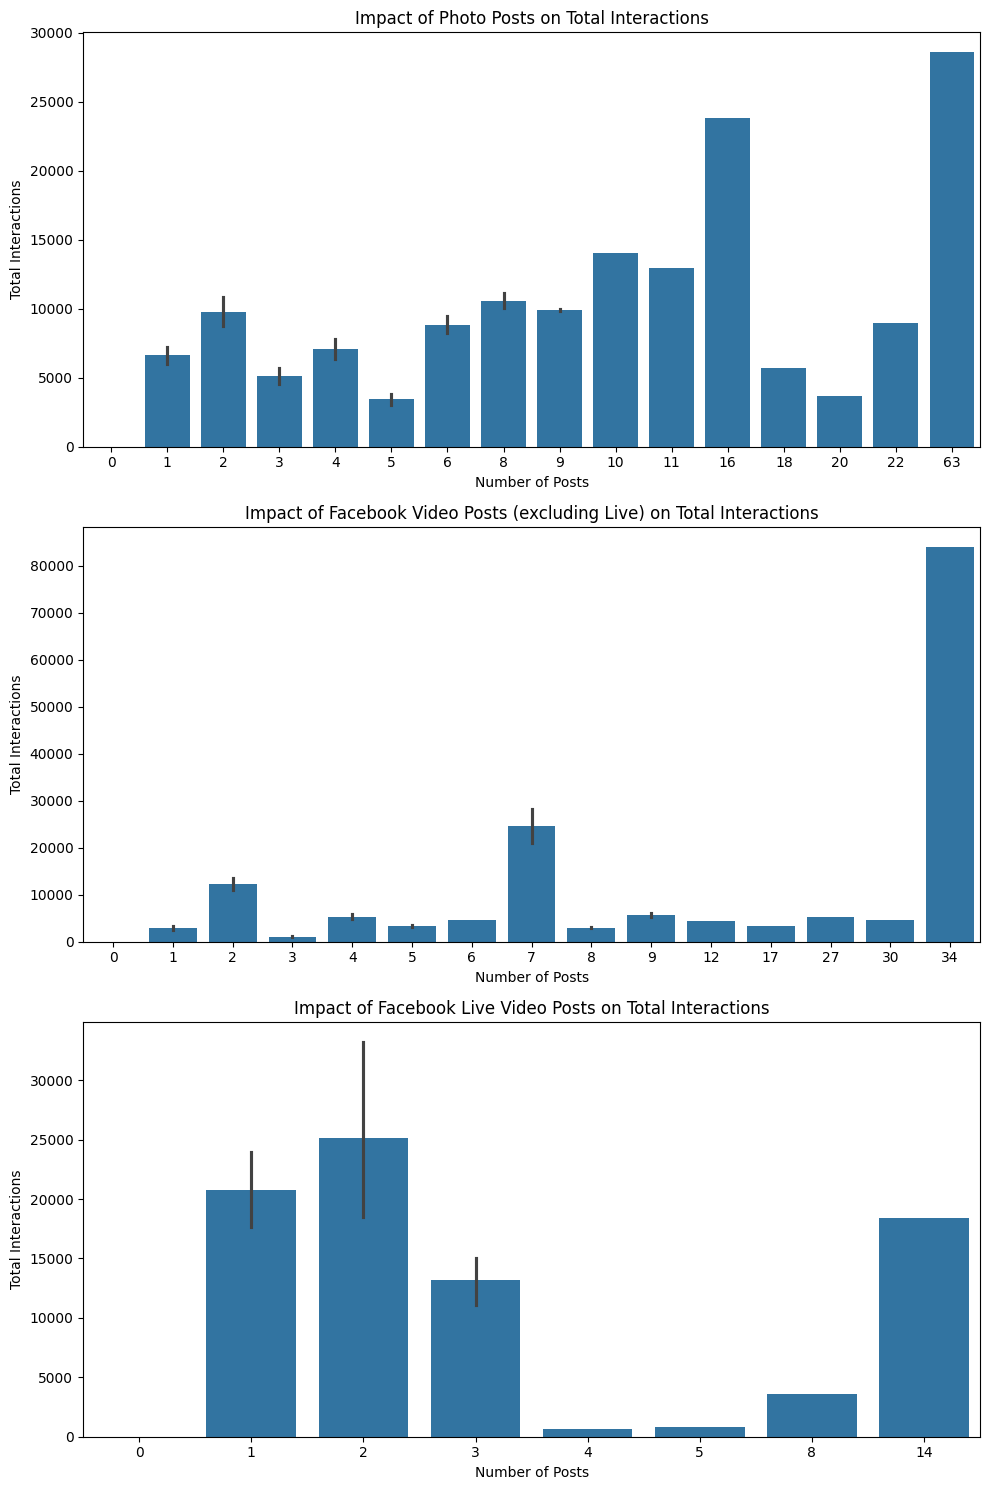

In [ ]:

# Analyzing the impact of different post types on total interactions
post_types = ['Photo Posts', 'Facebook Video Posts (excluding Live)', 'Facebook Live Video Posts']
interactions_types = ['Photo Interactions', 'Facebook Video Interactions (excluding Live)', 'Facebook Live Interactions']

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for i, post_type in enumerate(post_types):
    sns.barplot(x=data[post_type], y=data[interactions_types[i]], ax=axes[i])
    axes[i].set_title(f'Impact of {post_type} on Total Interactions')
    axes[i].set_xlabel('Number of Posts')
    axes[i].set_ylabel('Total Interactions')

plt.tight_layout()
plt.show()


### Observations from Detailed Engagement Analysis

The bar plots above indicate the direct impact of different types of posts on user interactions. For instance, videos might show a different level of engagement compared to photos, highlighting the preferences of the audience towards content type.

## Detailed Reaction Analysis

In [ ]:

# Analyzing the distribution of reaction types across all posts
reactions = ['Likes', 'Love', 'Haha', 'Wow', 'Sad', 'Angry']
fig, ax = plt.subplots(figsize=(10, 6))
data[reactions].sum().plot(kind='bar', ax=ax)
ax.set_title('Distribution of Reaction Types')
ax.set_xlabel('Reaction Type')
ax.set_ylabel('Total Count')
plt.show()


### Observations from Detailed Reaction Analysis

This bar chart provides insights into how people are reacting to posts on the page. A higher number of 'Likes' may suggest general approval, while significant 'Angry' reactions could indicate discontent or disagreement with certain posts.

## Detailed Time Series Analysis

In [ ]:

# Time series analysis of page likes and followers growth
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sns.lineplot(data=data, x='Beginning Of Interval', y='Page Likes', ax=ax[0], color='blue')
ax[0].set_title('Trend of Page Likes Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Page Likes')

sns.lineplot(data=data, x='Beginning Of Interval', y='Followers', ax=ax[1], color='green')
ax[1].set_title('Trend of Followers Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Followers')

plt.tight_layout()
plt.show()


### Observations from Detailed Time Series Analysis

The line plots illustrate the growth trends of page likes and followers. Any spikes or drops could correlate with specific campaigns or events. Consistent growth may indicate effective content strategies, while plateaus or declines could suggest areas for improvement.

In [ ]:
# Summarize the engagement data
engagement_data = data[[
    'Total Interactions',
    'Post Count',
    'Comments',
    'Shares',
    'Total Reactions (including Likes)',
    'Likes',
    'Love',
    'Haha',
    'Wow',
    'Sad',
    'Angry'
    ]]

engagement_data.head()

,Total Interactions,Post Count,Comments,Shares,Total Reactions (including Likes),Likes,Love,Haha,Wow,Sad,Angry
0,0,0,0,0,0,0,0,0,0,0,0
1,164087,12,68336,6066,89685,52118,34755,111,360,78,75
2,0,0,0,0,0,0,0,0,0,0,0
3,12339,10,2165,434,9740,7551,1971,20,25,5,4
4,19776,8,5568,646,13562,11190,2112,29,56,10,20


In [ ]:
data['Beginning Of Interval']

0      2023-06-01
1      2023-05-01
2      2023-02-01
3      2023-02-01
4      2022-10-01
          ...    
9995   2023-01-01
9996   2023-04-01
9997   2023-03-01
9998   2022-12-01
9999   2022-10-01
Name: Beginning Of Interval, Length: 10000, dtype: datetime64[ns]

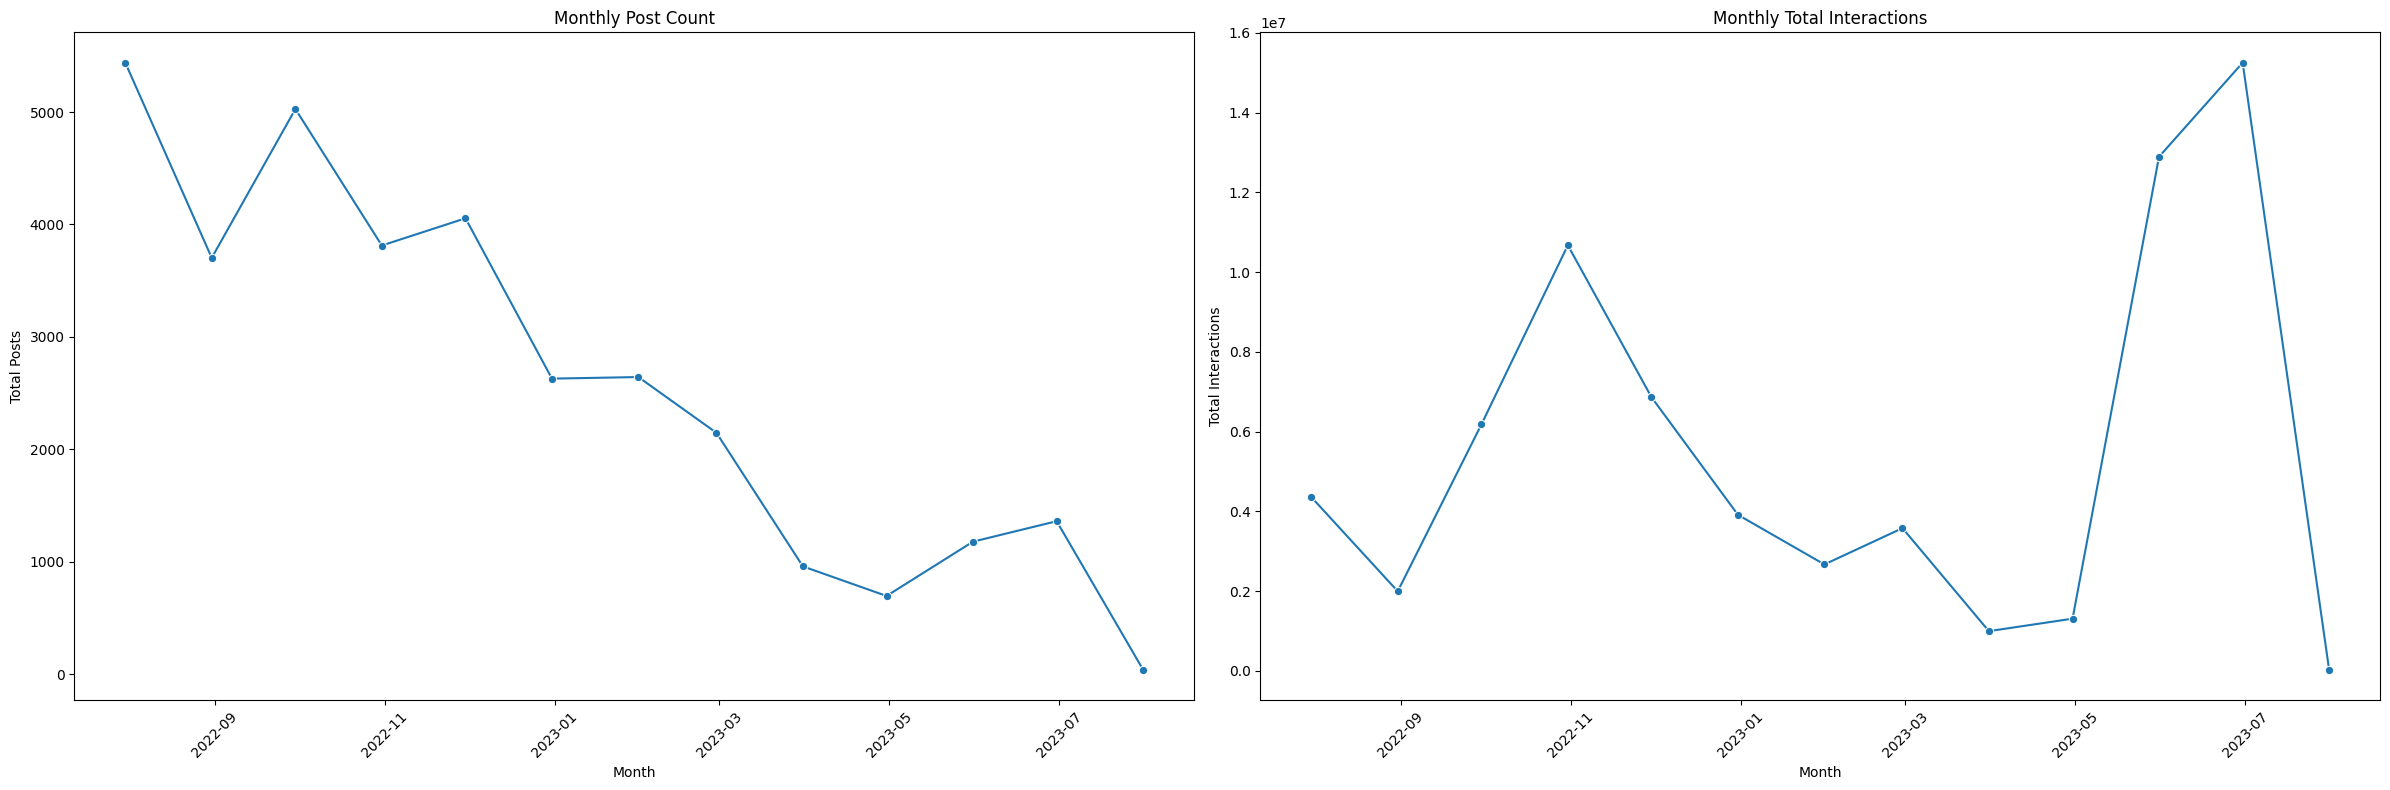

In [ ]:
# Group data by 'Beginning Of Interval' and aggregate the necessary metrics
monthly_data = data.groupby(pd.Grouper(key='Beginning Of Interval', freq='M')).agg({
    'Post Count': 'sum',
    'Total Interactions': 'sum'
}).reset_index()

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(24, 8))  # Adjust the overall size to fit both plots

# Plotting Post Count over time
sns.lineplot(ax=axes[0], x='Beginning Of Interval', y='Post Count', data=monthly_data, marker='o')
axes[0].set_title('Monthly Post Count')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Posts')
axes[0].tick_params(axis='x', rotation=45)

# Plotting Total Interactions over time
sns.lineplot(ax=axes[1], x='Beginning Of Interval', y='Total Interactions', data=monthly_data, marker='o')
axes[1].set_title('Monthly Total Interactions')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Interactions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
post_cnt = data.groupby(by = ['Page Name','Post Count']).agg('count').reset_index()
post_cnt = post_cnt.groupby(['Page Name']).agg(counts = ('Post Count', 'count')).reset_index()
pages_with_less_cnt = post_cnt[post_cnt['counts'] == 1]['Page Name'].to_list()
pages_with_less_cnt

['Facebook 360', 'Facebook Marketing Expert Reminder', 'Facebook Security']

In [ ]:
page_names = data['Page Name'].unique()
pages = []
for page in page_names:
  if page not in pages_with_less_cnt:
    pages.append(page)

pages

['Facebook for Creators',
 'Facebook Public Affairs',
 'Facebook Gaming',
 'Facebook',
 'Cricket on Facebook',
 'Facebook Community',
 'Facebook Marketplace Community']

In [ ]:
# Group data by 'Page Name' and 'Beginning Of Interval' and aggregate the necessary metrics
monthly_data_per_page = data.groupby(['Page Name', pd.Grouper(key='Beginning Of Interval', freq='M')]).agg({
    'Post Count': 'sum',
    'Total Interactions': 'sum'
}).reset_index()

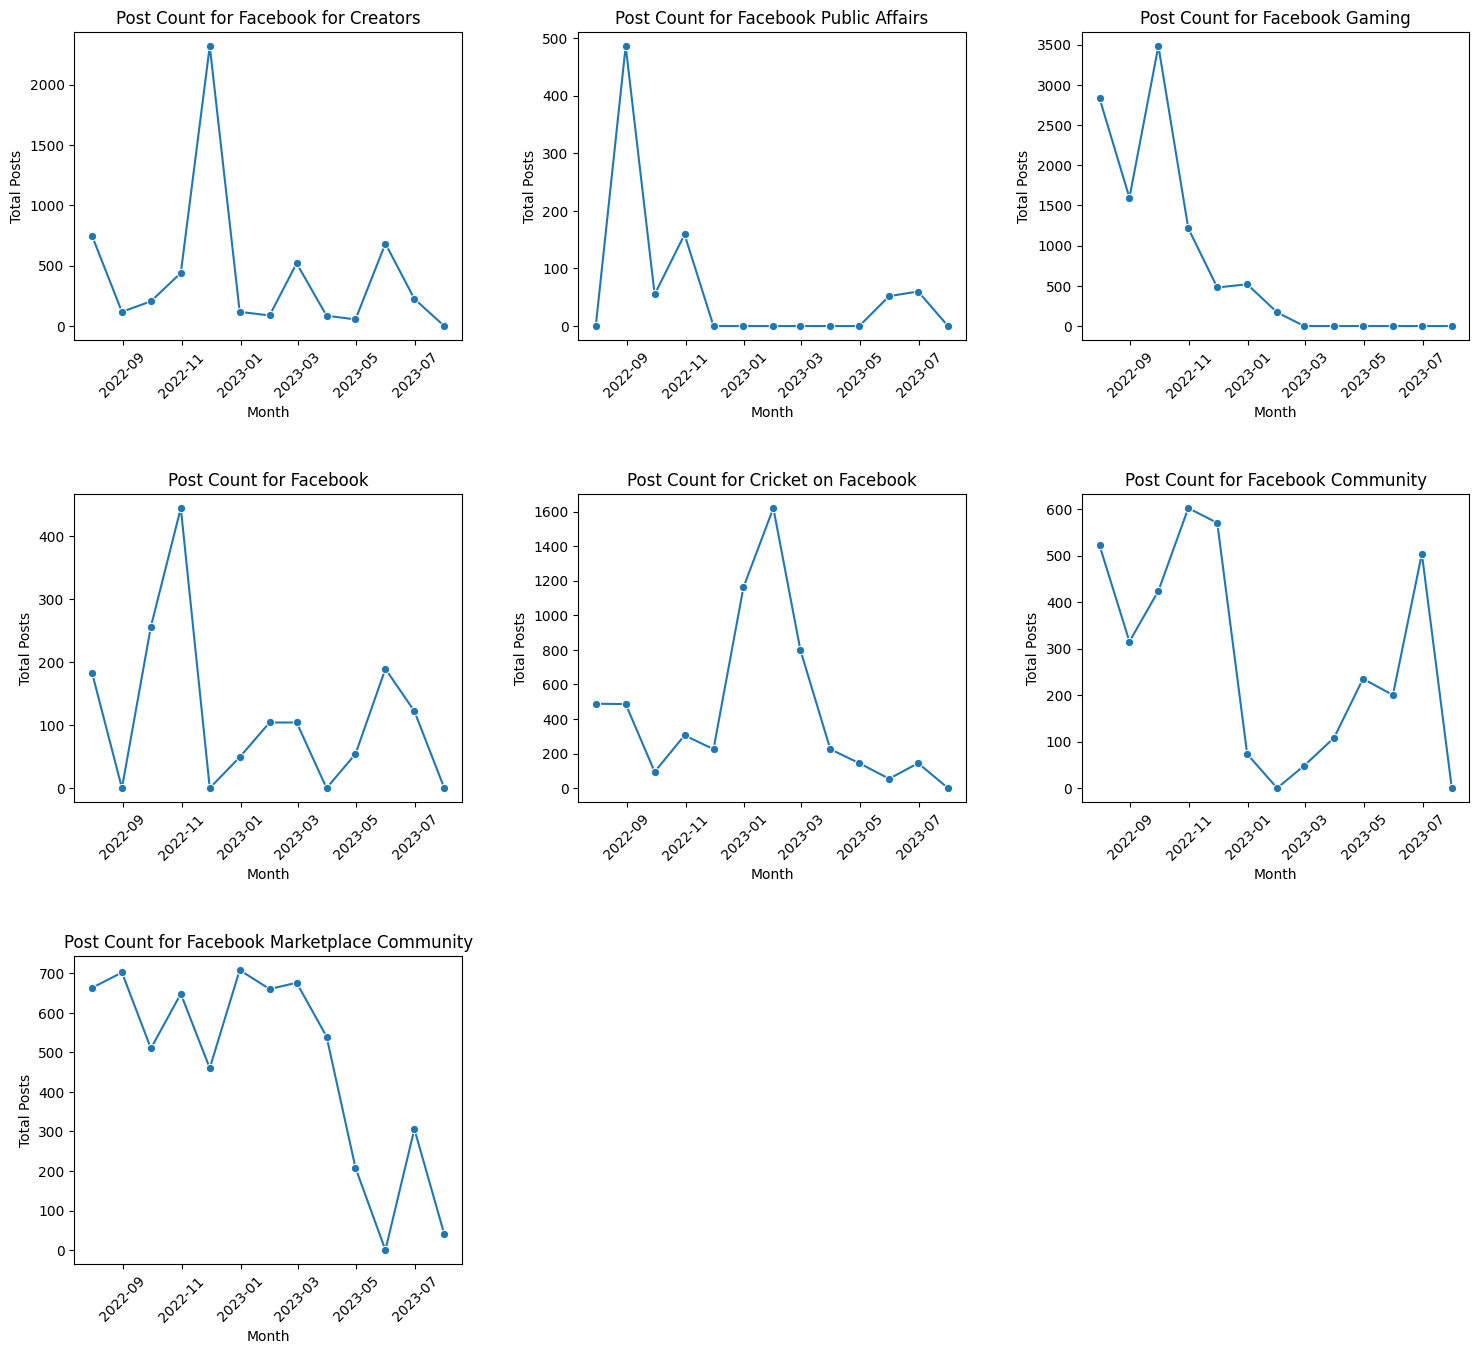

In [ ]:
# Prepare the subplot grid
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing to prevent overlap

# Plot counters
row = 0
col = 0

for page in pages:
    specific_page = page
    filtered_data = monthly_data_per_page[monthly_data_per_page['Page Name'] == specific_page]

    # Plotting Post Count over time for a specific page
    sns.lineplot(ax=axes[row, col], x='Beginning Of Interval', y='Post Count', data=filtered_data, marker='o')
    axes[row, col].set_title(f'Post Count for {specific_page}')
    axes[row, col].set_xlabel('Month')
    axes[row, col].set_ylabel('Total Posts')
    axes[row, col].tick_params(axis='x', rotation=45)

    # Update subplot indices
    col += 1
    if col >= n_cols:
        col = 0
        row += 1
        if row >= n_rows:
            # Show the full grid and start a new one
            plt.show()
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 16))
            fig.subplots_adjust(hspace=0.5, wspace=0.3)
            row = 0

# Handle any remaining subplots that might not be used
for i in range(row, n_rows):
    for j in range(col, n_cols):
        axes[i, j].axis('off')

plt.show()


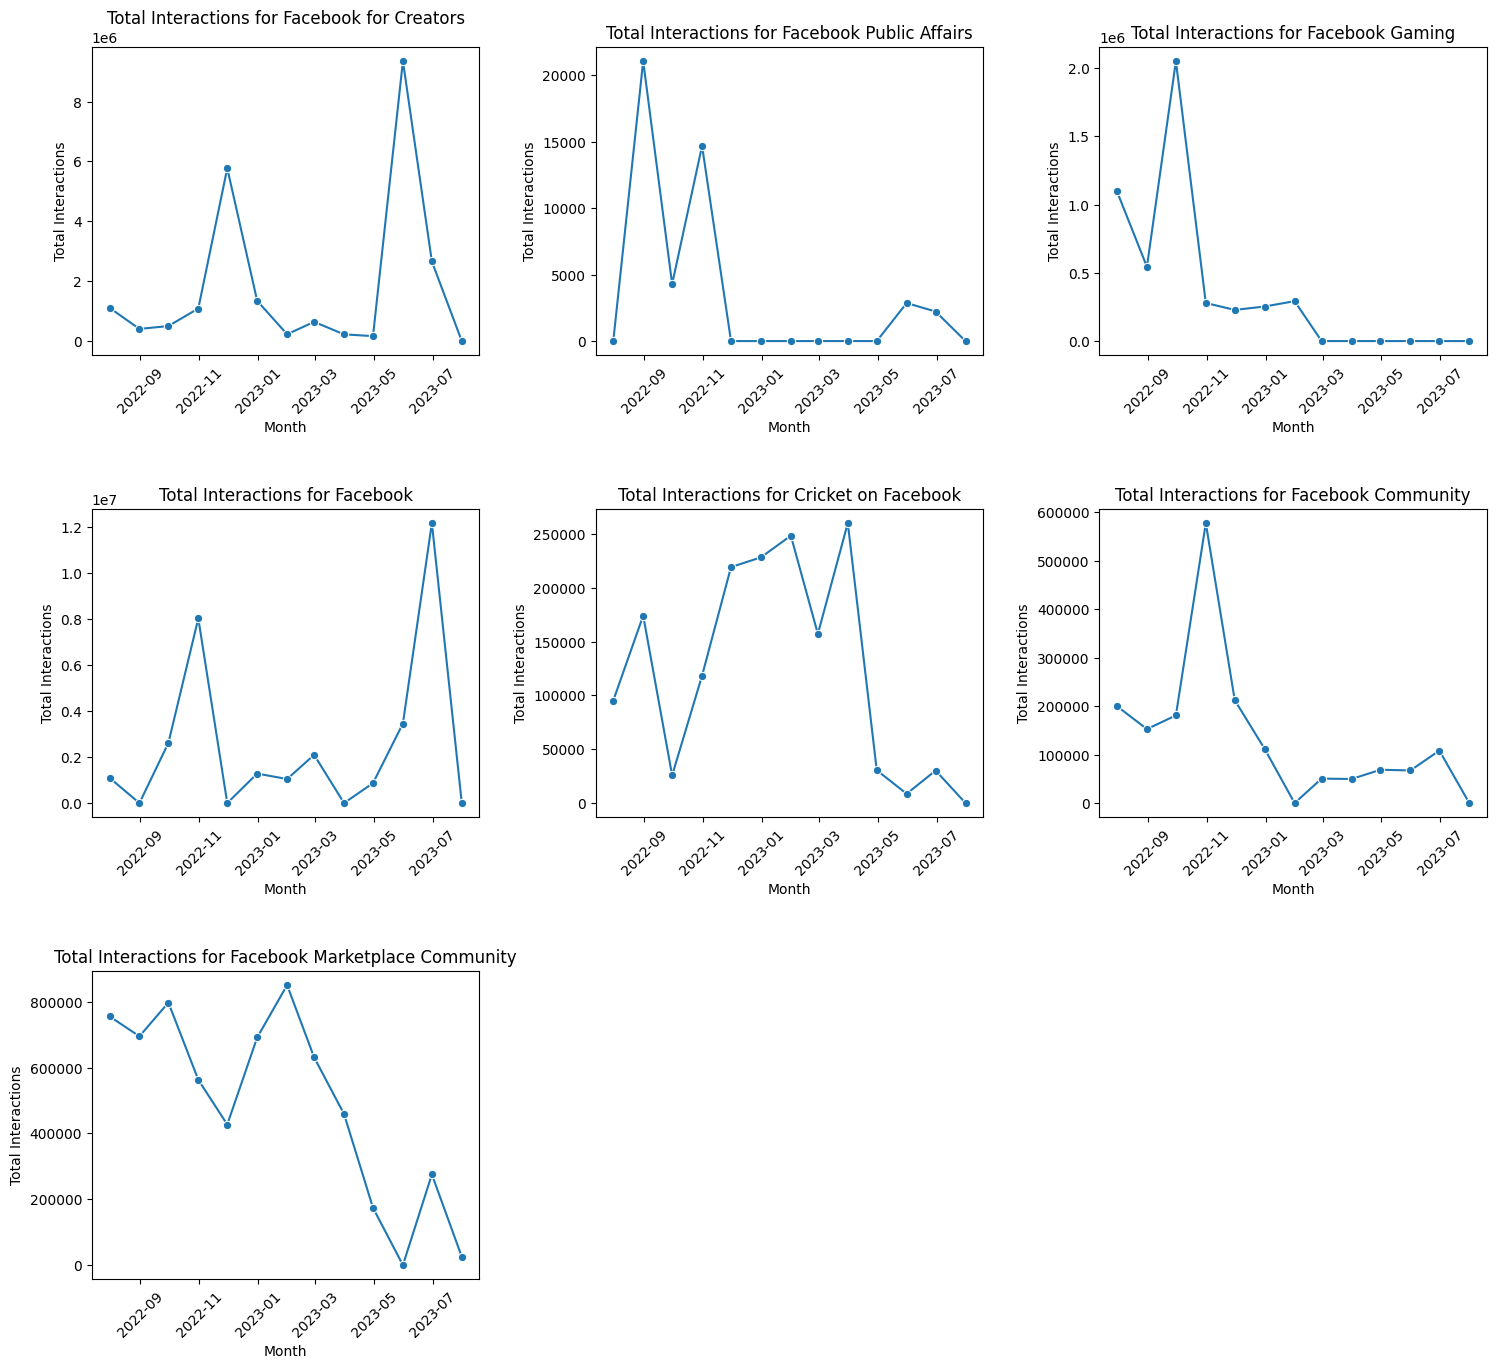

In [ ]:
# Prepare the subplot grid
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing to prevent overlap

# Plot counters
row = 0
col = 0

for page in pages:
    specific_page = page
    filtered_data = monthly_data_per_page[monthly_data_per_page['Page Name'] == specific_page]

    # Plotting Total Interactions over time for a specific page
    sns.lineplot(ax=axes[row, col], x='Beginning Of Interval', y='Total Interactions', data=filtered_data, marker='o')
    axes[row, col].set_title(f'Total Interactions for {specific_page}')
    axes[row, col].set_xlabel('Month')
    axes[row, col].set_ylabel('Total Interactions')
    axes[row, col].tick_params(axis='x', rotation=45)

    # Update subplot indices
    col += 1
    if col >= n_cols:
        col = 0
        row += 1
        if row >= n_rows:
            # Show the full grid and start a new one
            plt.show()
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 16))
            fig.subplots_adjust(hspace=0.5, wspace=0.3)
            row = 0

# Handle any remaining subplots that might not be used
for i in range(row, n_rows):
    for j in range(col, n_cols):
        axes[i, j].axis('off')

plt.show()


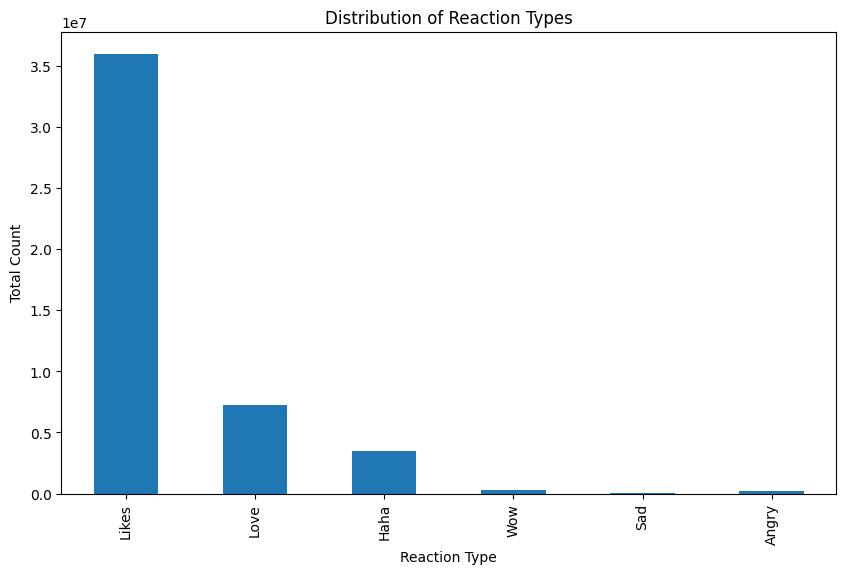

In [ ]:
# Analyzing reactions types
reaction_types = ['Likes', 'Love', 'Haha', 'Wow', 'Sad', 'Angry']
data[reaction_types].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Reaction Types')
plt.xlabel('Reaction Type')
plt.ylabel('Total Count')
plt.show()

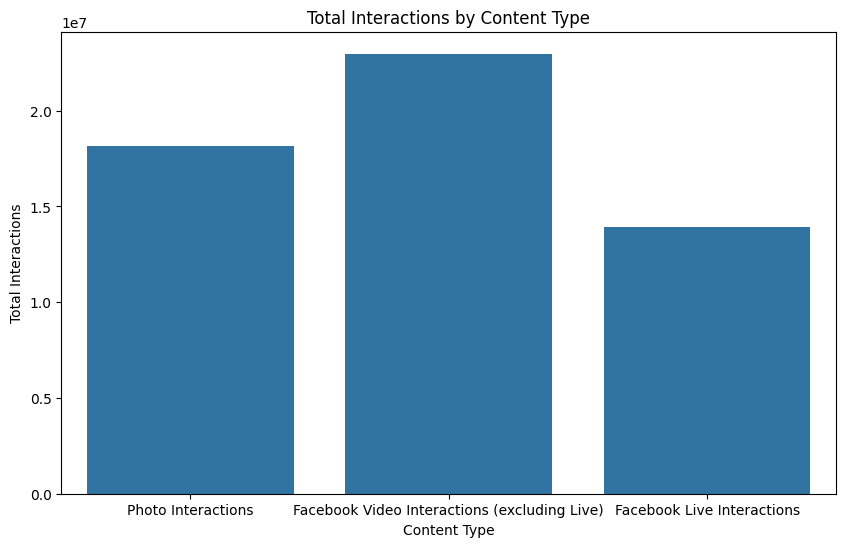

In [ ]:
# Analysis 1: Content Type Effectiveness
# Comparative Analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=data[['Photo Interactions', 'Facebook Video Interactions (excluding Live)', 'Facebook Live Interactions']].sum().reset_index(), x='index', y=0)
plt.title('Total Interactions by Content Type')
plt.ylabel('Total Interactions')
plt.xlabel('Content Type')
plt.show()

In [ ]:
# Analysis 2: Engagement Rate Calculation
# Calculate Engagement Rate per Post Type
data['Photo Engagement Rate'] = data['Photo Interactions'] / data['Photo Posts']
data['Video Engagement Rate'] = data['Facebook Video Interactions (excluding Live)'] / data['Facebook Video Posts (excluding Live)']
data['Live Video Engagement Rate'] = data['Facebook Live Interactions'] / data['Facebook Live Video Posts']

# Display Engagement Rates
engagement_rates = data[['Photo Engagement Rate', 'Video Engagement Rate', 'Live Video Engagement Rate']].mean()
print("Average Engagement Rates:", engagement_rates)

Average Engagement Rates: Photo Engagement Rate          3154.432475
Video Engagement Rate          2426.230083
Live Video Engagement Rate    11938.925414
dtype: float64


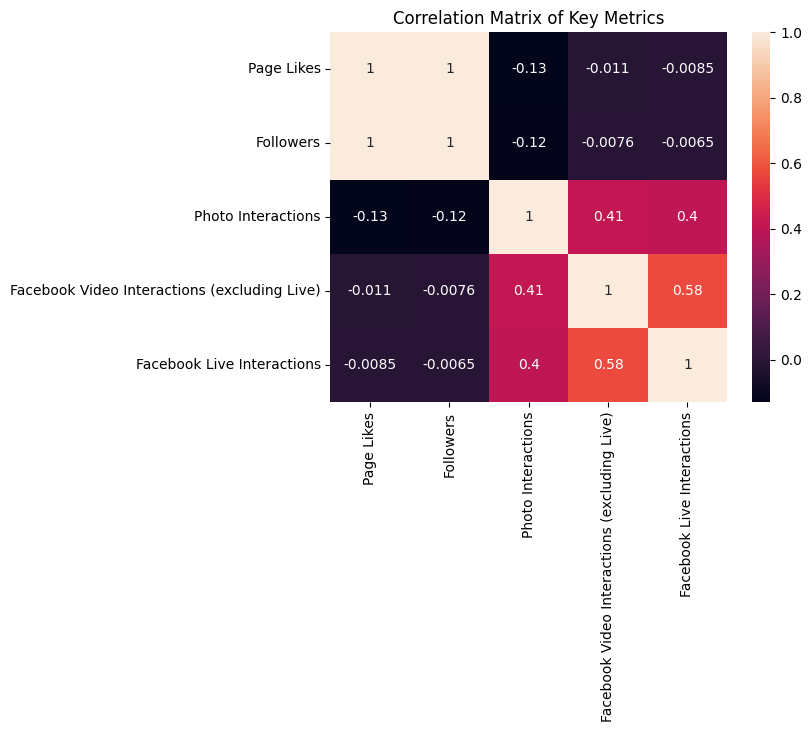

In [ ]:
# Analysis 4: Correlation Analysis
# Correlation heatmap
correlation_matrix = data[['Page Likes', 'Followers', 'Photo Interactions', 'Facebook Video Interactions (excluding Live)', 'Facebook Live Interactions']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

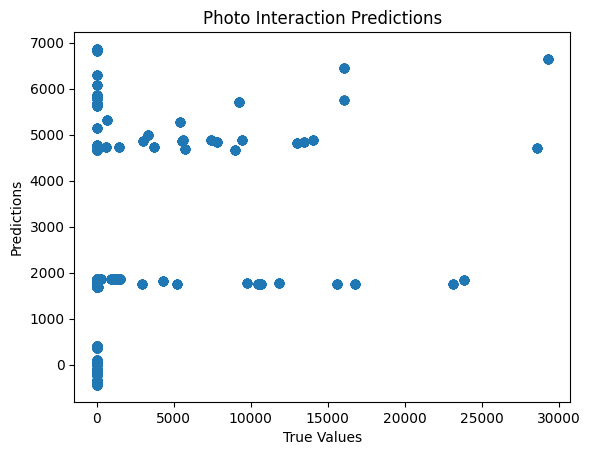

In [ ]:
# Analysis 6: Advanced Statistical Modeling
# Predictive Modeling Example: Simple Linear Regression (predicting photo interactions)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['Page Likes', 'Followers']]  # More features can be included
y = data['Photo Interactions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot predictions vs actual
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Photo Interaction Predictions')
plt.show()

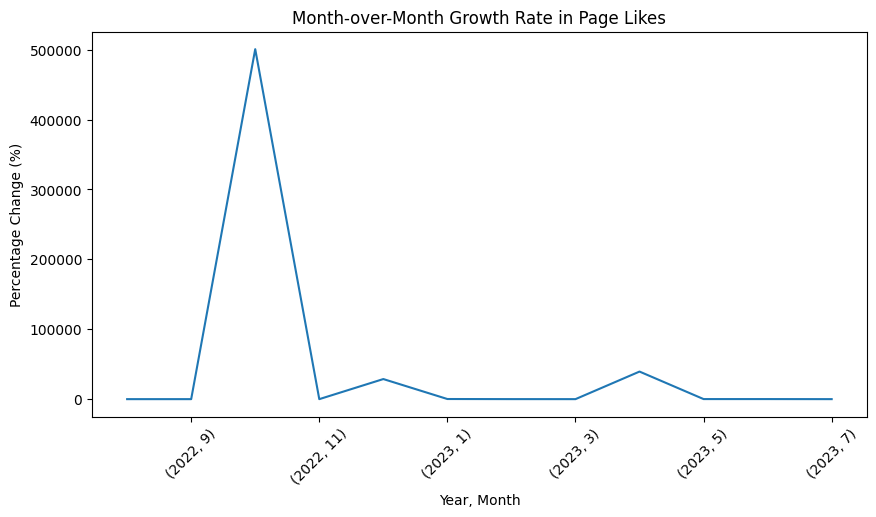

In [ ]:
data.set_index('Beginning Of Interval', inplace=True)

# Extracting month and year from the index
data['Month'] = data.index.month
data['Year'] = data.index.year

# Group by year and month, and get the last value to ensure we're looking at month-end figures
monthly_data = data.groupby(['Year', 'Month'])['Page Likes'].last()

# Calculating month-over-month percentage change
mom_growth = monthly_data.pct_change() * 100

# Plotting Month-over-Month Growth Rate
mom_growth.plot(figsize=(10, 5))
plt.title('Month-over-Month Growth Rate in Page Likes')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Year, Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Second Dataset

In [ ]:
data = pd.read_csv('FB_Data2.csv')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,137020,Photo,3,10,3,10,0.0,1711,3174,288,245,339,2226,1118,205,2,63.0,14.0,79
1,100732,Photo,1,3,6,15,0.0,7192,12811,587,554,3941,11519,6616,472,11,95.0,4.0,110
2,117764,Photo,3,5,6,8,1.0,4336,7705,574,484,847,5156,2752,403,12,155.0,23.0,190
3,128032,Photo,2,7,4,5,1.0,53056,65260,2003,1412,2089,23679,17104,975,6,696.0,28.0,730
4,137020,Photo,3,10,1,11,0.0,3674,7221,452,330,487,3832,1890,328,9,181.0,32.0,222


In [ ]:
data.isnull().sum()

Page total likes                                                        0
Type                                                                    0
Category                                                                0
Post Month                                                              0
Post Weekday                                                            0
Post Hour                                                               0
Paid                                                                   27
Lifetime Post Total Reach                                               0
Lifetime Post Total Impressions                                         0
Lifetime Engaged Users                                                  0
Lifetime Post Consumers                                                 0
Lifetime Post Consumptions                                              0
Lifetime Post Impressions by people who have liked your Page            0
Lifetime Post reach by people who like

In [ ]:
data['Paid'] = data['Paid'].fillna(0)
data['like'] = data['like'].fillna(0)
data['share'] = data['share'].fillna(0)

# Convert 'Paid' from float to int after filling NaN values
data['Paid'] = data['Paid'].astype(int)

data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,137020,Photo,3,10,3,10,0,1711,3174,288,245,339,2226,1118,205,2,63.0,14.0,79
1,100732,Photo,1,3,6,15,0,7192,12811,587,554,3941,11519,6616,472,11,95.0,4.0,110
2,117764,Photo,3,5,6,8,1,4336,7705,574,484,847,5156,2752,403,12,155.0,23.0,190
3,128032,Photo,2,7,4,5,1,53056,65260,2003,1412,2089,23679,17104,975,6,696.0,28.0,730
4,137020,Photo,3,10,1,11,0,3674,7221,452,330,487,3832,1890,328,9,181.0,32.0,222


In [ ]:
for col in data.columns:
  print(col)

Page total likes
Type
Category
Post Month
Post Weekday
Post Hour
Paid
Lifetime Post Total Reach
Lifetime Post Total Impressions
Lifetime Engaged Users
Lifetime Post Consumers
Lifetime Post Consumptions
Lifetime Post Impressions by people who have liked your Page
Lifetime Post reach by people who like your Page
Lifetime People who have liked your Page and engaged with your post
comment
like
share
Total Interactions


In [ ]:
data.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                     int64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

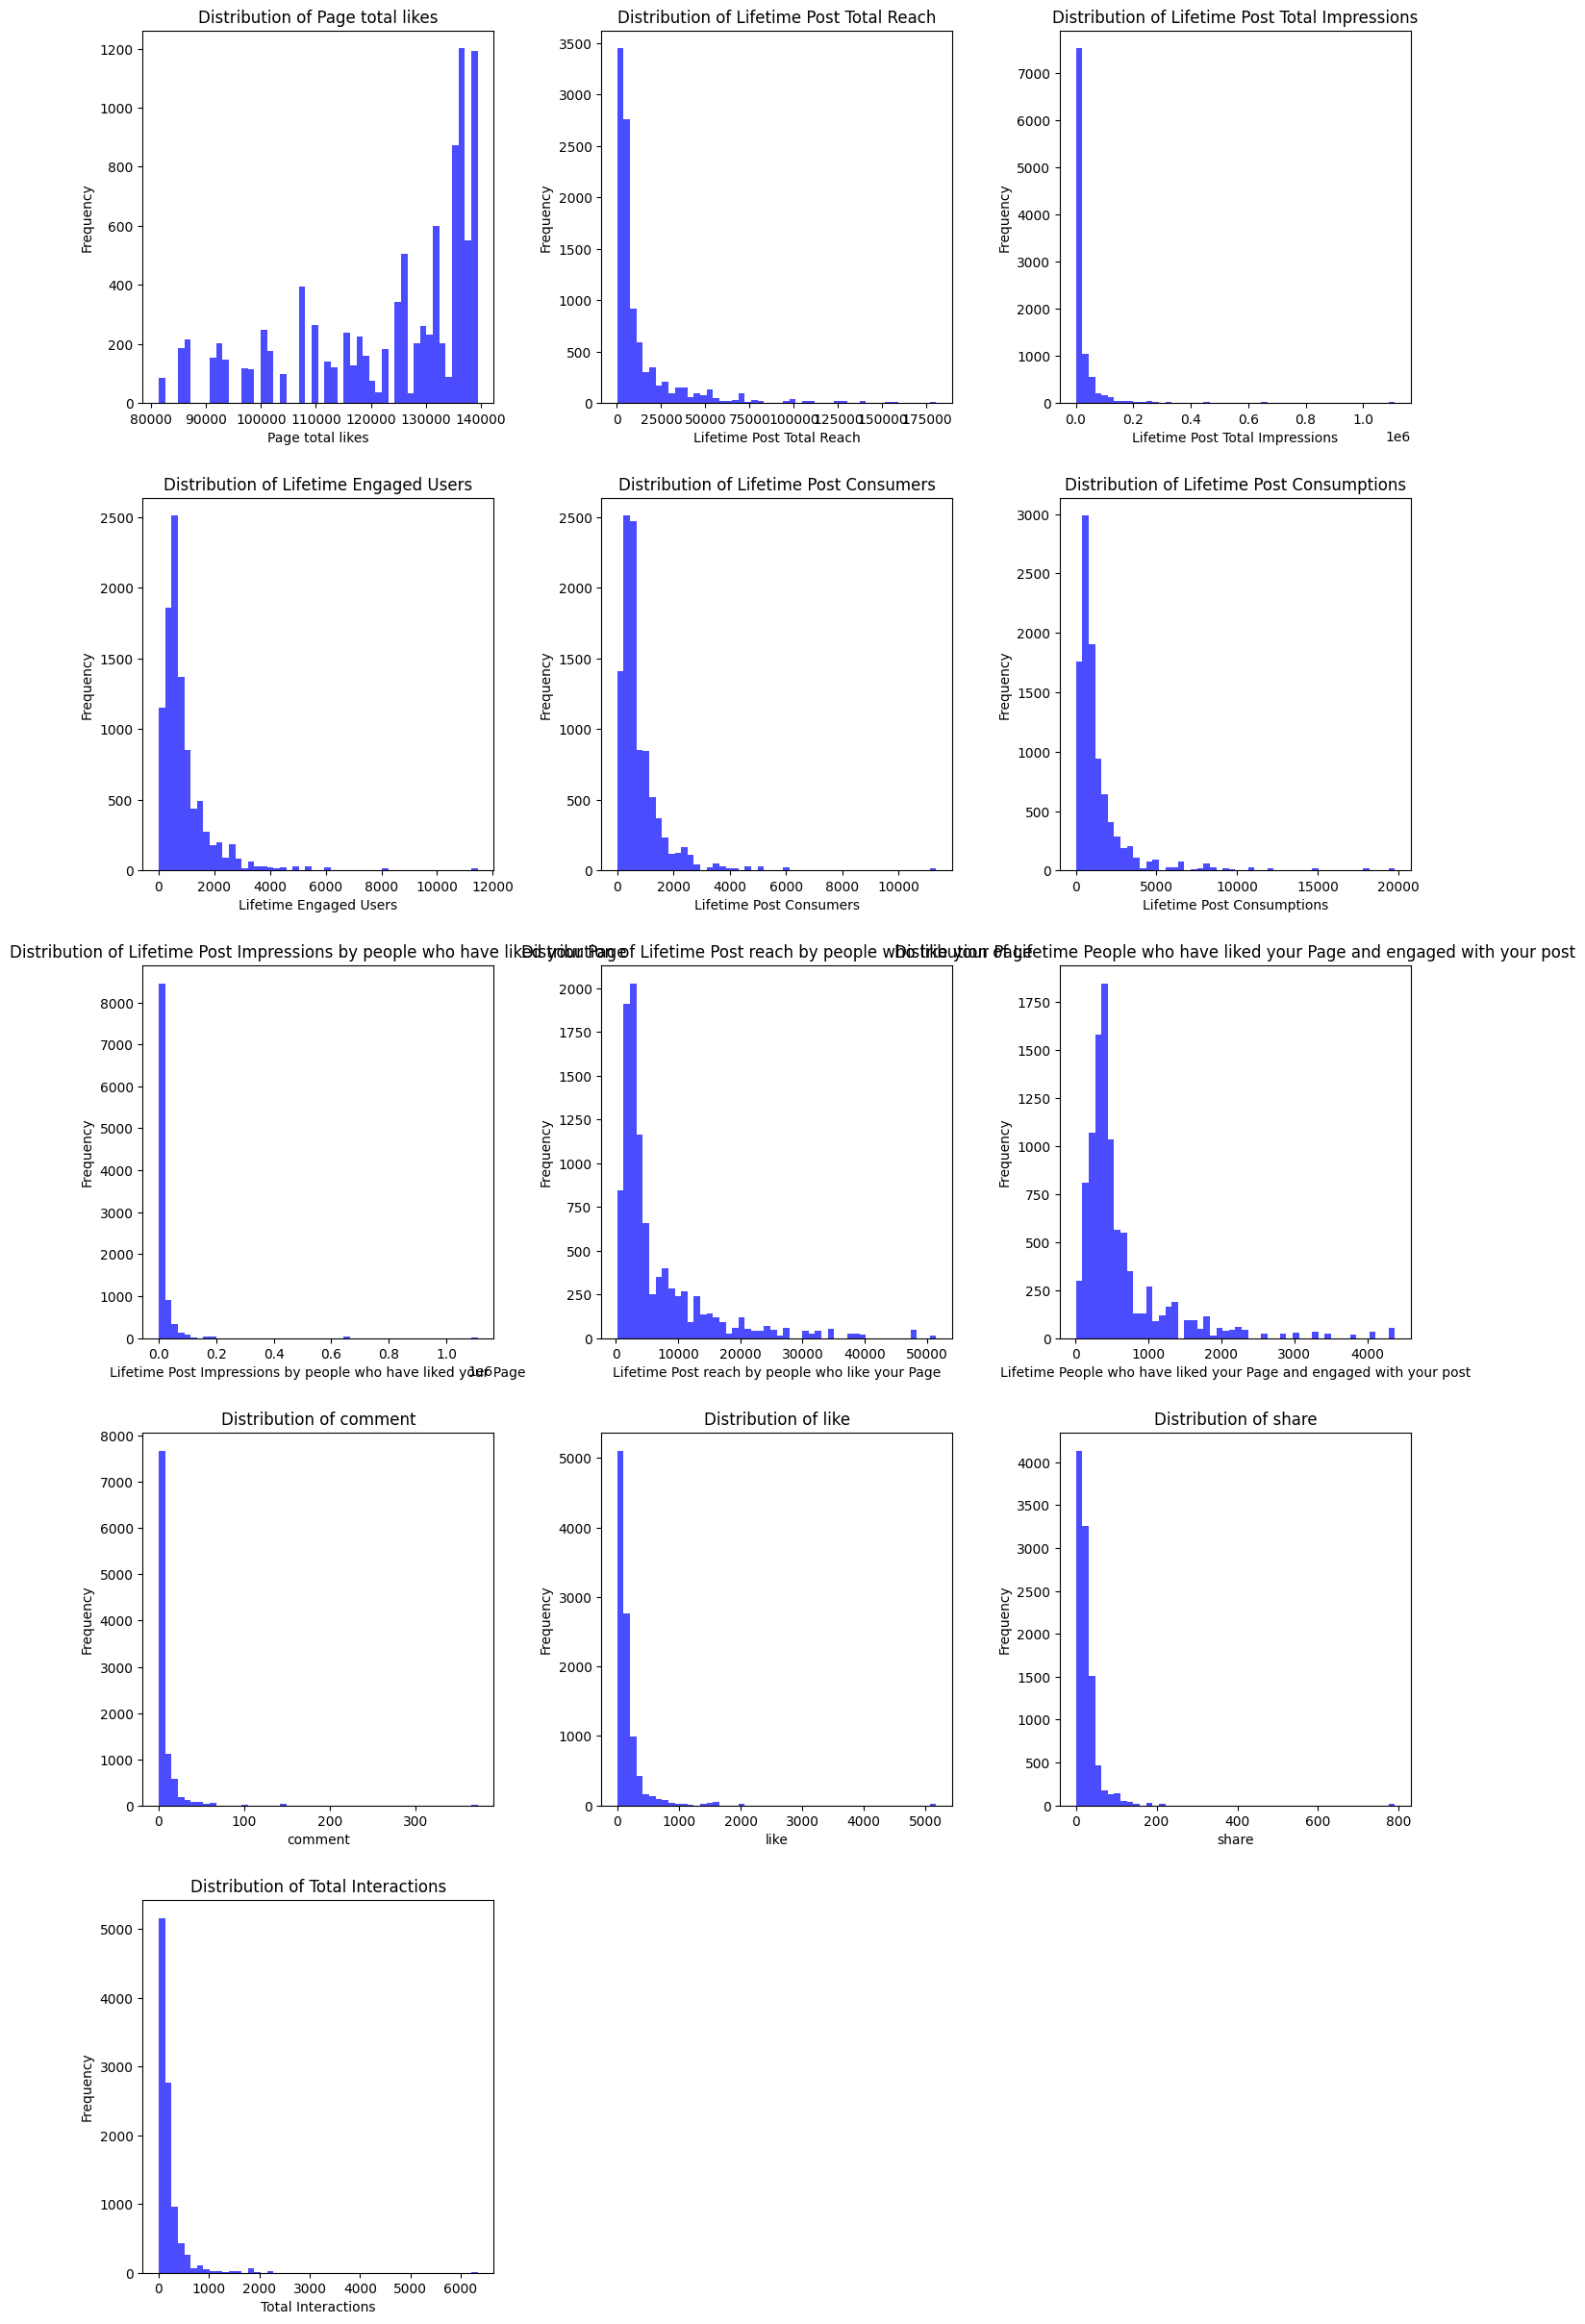

In [ ]:
# Columns for univariate analysis
numerical_cols = [
    "Page total likes", "Lifetime Post Total Reach", "Lifetime Post Total Impressions",
    "Lifetime Engaged Users", "Lifetime Post Consumers", "Lifetime Post Consumptions",
    "Lifetime Post Impressions by people who have liked your Page",
    "Lifetime Post reach by people who like your Page",
    "Lifetime People who have liked your Page and engaged with your post",
    "comment", "like", "share", "Total Interactions"
]

# Creating histograms for each specified column in a 5x3 grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting histograms
for i, column in enumerate(numerical_cols):
    axes[i].hist(data[column].dropna(), bins=50, color='blue', alpha=0.7)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# If there are empty subplots, hide them
for j in range(i+1, 15):
    axes[j].set_visible(False)

plt.show()

__Observations__

The histograms provide visual insights into the distribution of each variable:

- Page total likes and most other lifetime metrics show right-skewed distributions, indicating that most posts have relatively low engagement or reach but a few posts have extremely high values.
- Engagement metrics (like, comment, share) are also highly skewed, with most posts receiving a relatively low number of interactions compared to a few posts that receive very high engagement.

In [ ]:
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,123156.518000,1.879800,7.034600,4.175000,7.910600,0.284200,13874.86350,2.962414e+04,924.879600,804.59160,1427.604400,1.711288e+04,6631.037800,618.117200,7.441600,176.133500,26.528700,210.103800
std,16233.562885,0.851601,3.305253,2.022618,4.378667,0.451055,22351.13788,7.630816e+04,987.204918,892.62303,2008.013443,6.059933e+04,7679.069977,632.062137,20.010023,306.057251,39.495361,358.542778
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.00000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,111620.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3286.00000,5.699000e+03,398.000000,333.00000,512.000000,3.961000e+03,2174.000000,292.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5292.00000,9.084000e+03,625.000000,554.00000,857.000000,6.282000e+03,3492.000000,414.000000,3.000000,101.000000,18.000000,124.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13216.00000,2.246800e+04,1062.000000,963.00000,1489.000000,1.538200e+04,8032.000000,662.000000,7.000000,188.000000,32.000000,230.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.00000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


**Descriptive Statistics**

- **Page total likes:** The average is about 123,157 likes with a standard deviation of 16,234, showing moderate variability around the mean.
- **Lifetime Post Total Reach:** On average, posts reach about 13,875 users, but the range is vast, going from as low as 238 to as high as 180,480.
- **Lifetime Post Total Impressions:** Average impressions are significantly higher than the reach, which is typical as impressions count multiple views by the same users.
- **Lifetime Engaged Users:** The mean engaged users are about 925, but this varies greatly across posts.
- **Lifetime Post Consumers and Consumptions:** Both show considerable spread, indicating differing levels of interaction depth across posts.
- **Interaction metrics (comment, like, share, Total Interactions):** All are skewed with a mean significantly lower than the maximum values, pointing to a few posts with exceptionally high interaction rates.

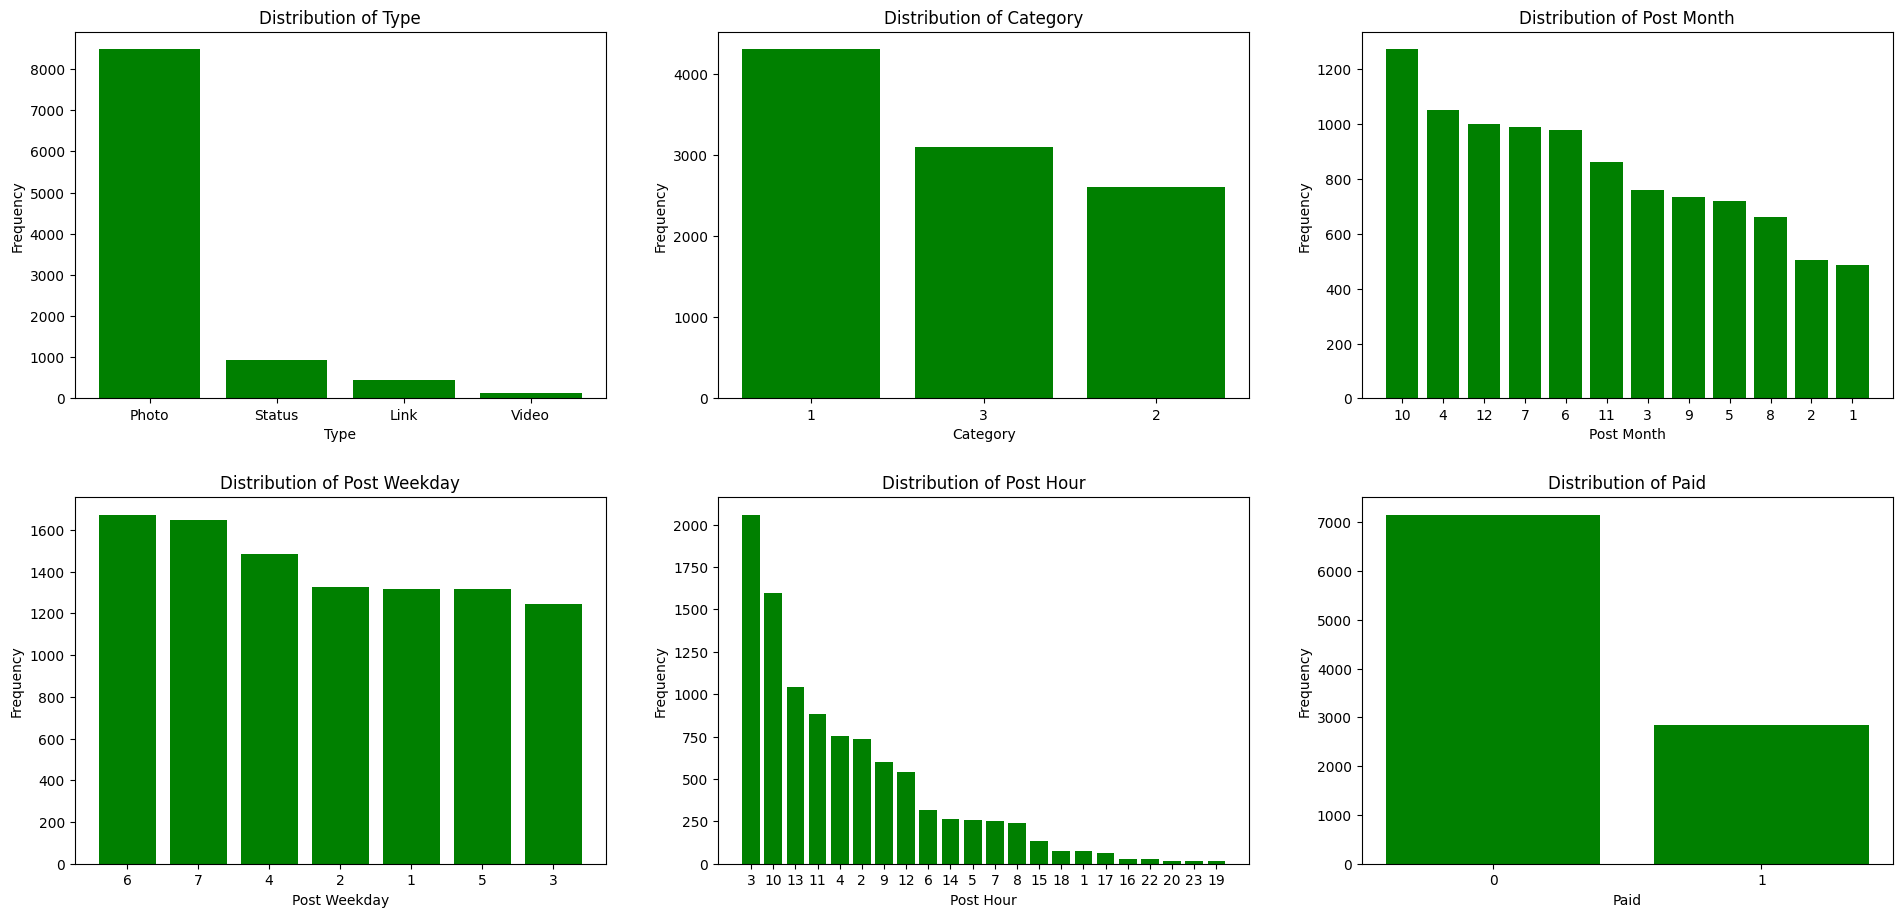

In [ ]:
# Selecting the categorical columns for univariate analysis
categorical_columns = ["Type", "Category", "Post Month", "Post Weekday", "Post Hour", "Paid"]

# Creating bar charts for each categorical column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))  # Adjusted for a 3x2 grid
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    value_counts = data[column].value_counts()
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='green')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

In [ ]:
# Displaying value counts for each categorical column
# value_counts_data = {column: data[column].value_counts() for column in categorical_columns}
# for column, counts in value_counts_data.items():
#     print(f'Distribution of {column}:')
#     print(counts)
#     print('\n')

**Observations**

- **Type:** Most of the posts are of the type 'Photo', which dominates the dataset with 8,477 entries. 'Status' follows with 935, 'Link' with 451, and 'Video' with 137. This indicates a heavy preference for photo content.
- **Category:** The posts are fairly evenly distributed across three categories, with Category 1 having the most posts (4,299), followed by Category 3 (3,097) and Category 2 (2,604).
- **Post Month:** Posts are more frequently made in October (1,271 posts) and less in January (486 posts), indicating a possible seasonal trend in posting behavior.
- **Post Weekday:** Posts are more frequent towards the end of the week, with Saturday (1,673 posts) and Sunday (1,645 posts) being the most popular days.
- **Post Hour:** The 3rd hour (2 AM) has the highest number of posts (2,060), suggesting timing strategies for posts, perhaps targeting specific time zones or user activity patterns.
- **Paid:** A significant number of posts are unpaid (7,131), with 2,842 being paid posts. This could be relevant for analyzing the impact of paid promotion on engagement.

In [ ]:
# Calculate the Pearson correlation coefficient
correlation = data['Page total likes'].corr(data['Lifetime Post Total Reach'])
print(f'The Pearson correlation coefficient between Page total likes and Lifetime Post Total Reach is: {correlation}')

The Pearson correlation coefficient between Page total likes and Lifetime Post Total Reach is: -0.07689919474747103


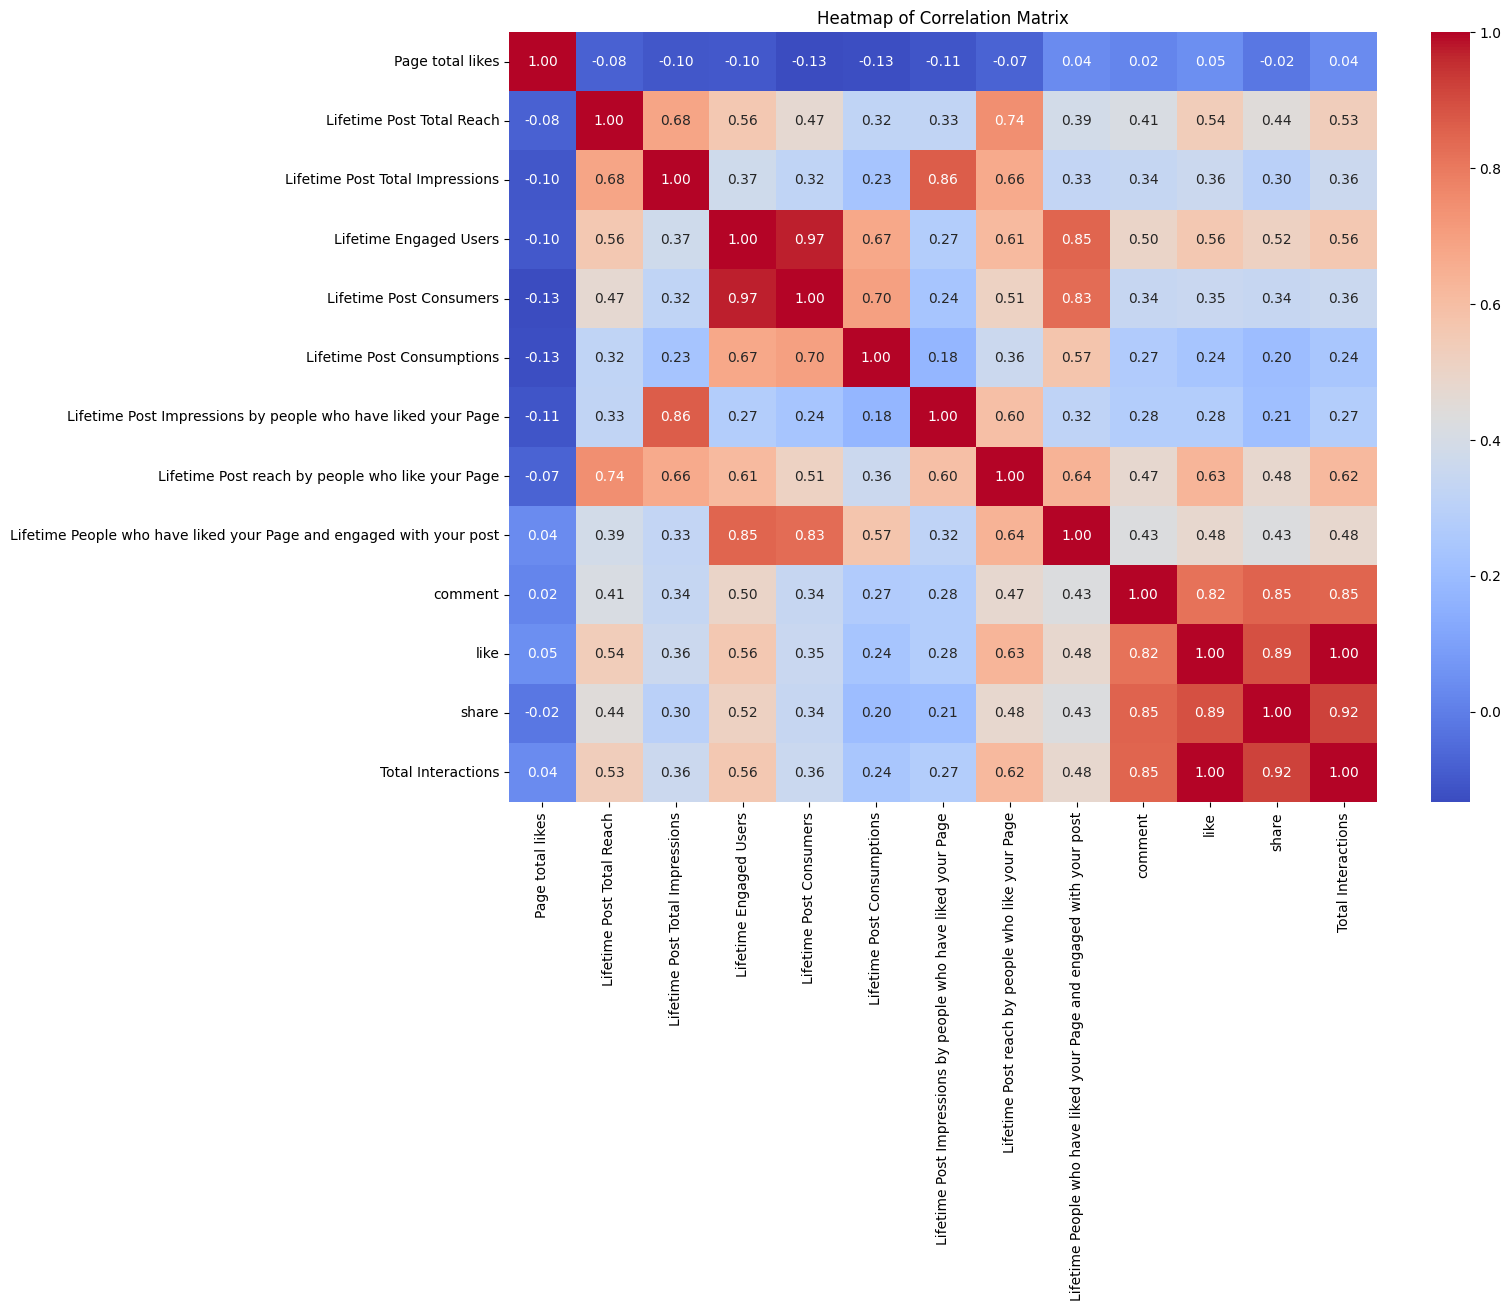

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**Observations**

- **High correlations:** Variables like "Lifetime Post Total Reach" and "Lifetime Post Total Impressions" have a high positive correlation, suggesting that as more people see a post, the number of times it's displayed also increases.
- **Engagement metrics:** "Lifetime Engaged Users", "Lifetime Post Consumers", and "Lifetime Post Consumptions" show strong positive correlations with each other, indicating that posts engaging a user typically see more consumptions and consumers.
- **User interactions:** The "like", "share", and "comment" metrics are positively correlated with each other and with "Total Interactions", as expected, since they contribute directly to the total interactions count.
- **Page popularity:** "Page total likes" shows moderate correlation with several reach and engagement metrics, suggesting that more popular pages tend to have posts with higher reach and engagement, though the relationship isn't as strong as one might expect.

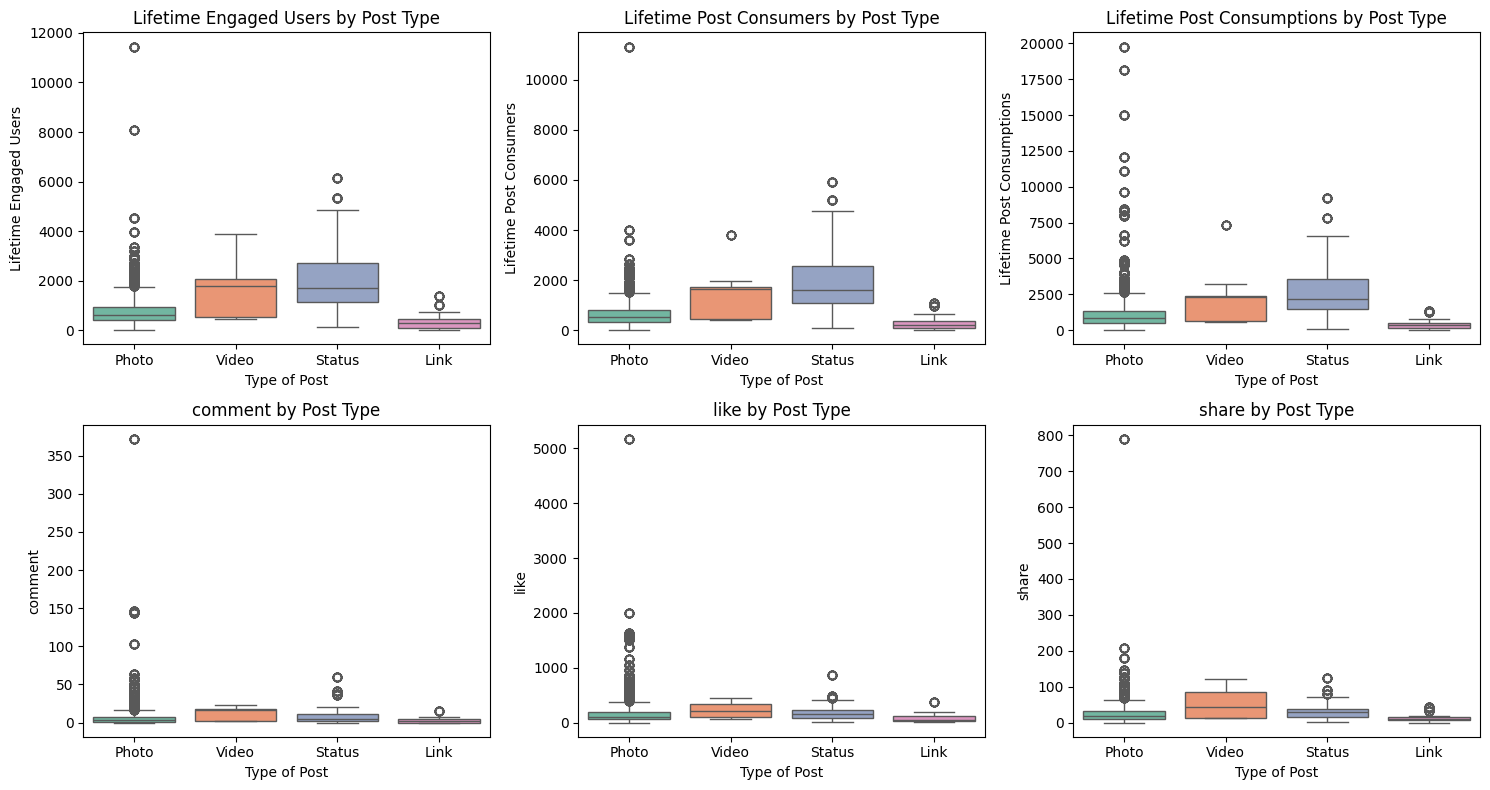

In [ ]:
# Define metrics for analysis
metrics = [
    'Lifetime Engaged Users', 'Lifetime Post Consumers',
    'Lifetime Post Consumptions', 'comment', 'like', 'share'
]

# Setting up the figure and axes for a 3x2 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, metric in enumerate(metrics):
    sns.boxplot(x='Type', y=metric, data=data, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{metric} by Post Type')
    axes[i].set_xlabel('Type of Post')
    axes[i].set_ylabel(metric)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

**Observations**

- **Lifetime Engaged Users:** Certain post types like Videos might show higher median engagement due to their interactive nature, but could also have wider variability indicating inconsistency in performance.
- **Lifetime Post Consumers:** Photos often have a high number of consumers due to their quick consumption nature and visibility.
- **Lifetime Post Consumptions:** Observation: Posts that are more engaging in nature (e.g., Videos) might show higher consumptions per post.
Implication: Investing in richer content forms like videos can lead to more interactions per viewer, beneficial for campaigns aiming for deep engagement.
- **Comment:** Status updates might elicit more comments if they involve compelling content or prompts that encourage user responses.
- **Like:** Likes are generally higher for Photos due to the ease of interaction with visually appealing content.
- **Share:** Content that is highly shareable often resonates emotionally or contains useful information (possibly Status or Video).

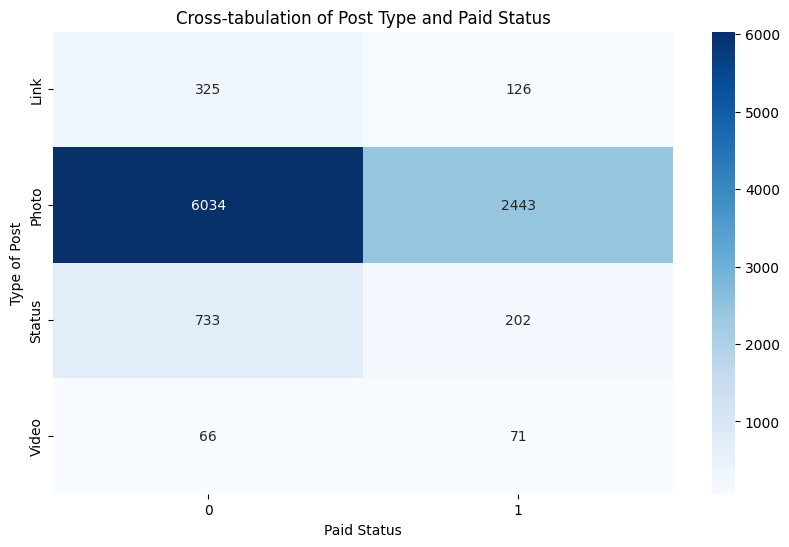

Chi-squared Test results:
Chi-squared Statistic: 58.95707556381264
P-value: 9.818138283237214e-13
Degrees of Freedom: 3


In [ ]:
# Creating a cross-tabulation
crosstab = pd.crosstab(data['Type'], data['Paid'])

# Plotting the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap='Blues')
plt.title('Cross-tabulation of Post Type and Paid Status')
plt.xlabel('Paid Status')
plt.ylabel('Type of Post')
plt.show()

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-squared Test results:\nChi-squared Statistic: {chi2}\nP-value: {p_value}\nDegrees of Freedom: {dof}")

**Observation**
- **Significant Association:** Since the p-value is extremely low, we reject the null hypothesis of independence. There is a statistically significant association between the type of post and whether it is paid or not.
- **Strategic Insights:** The result implies that certain types of posts are more likely to be paid for than others. For instance, perhaps promotional or high-impact content types like videos are more often paid to ensure they reach a larger audience.

The analysis clearly suggests that Facebook's strategy or the behavior of its users (or both) differ significantly when it comes to different types of posts and their paid status. Depending on the marketing goals, this insight can guide how to allocate budget for paid promotions, focusing more on the types of posts that are typically paid for and analyzing their ROI.

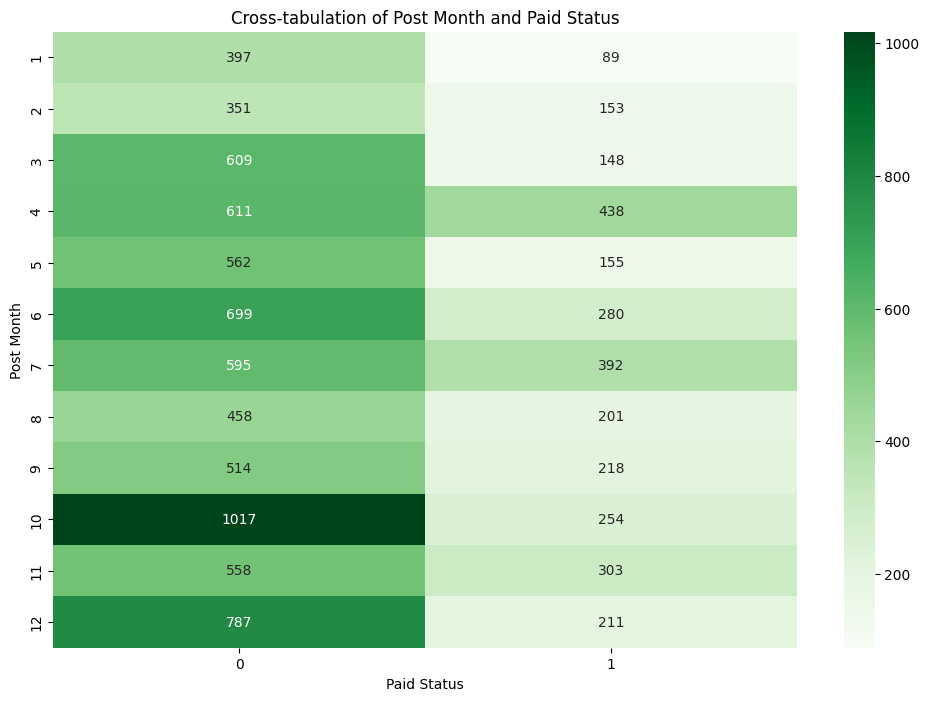

Chi-squared Test results:
Chi-squared Statistic: 316.4457121704971
P-value: 2.9853178560562804e-61
Degrees of Freedom: 11


In [ ]:
# Creating a cross-tabulation
crosstab = pd.crosstab(data['Post Month'], data['Paid'])

# Plotting the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap='Greens')
plt.title('Cross-tabulation of Post Month and Paid Status')
plt.xlabel('Paid Status')
plt.ylabel('Post Month')
plt.show()

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-squared Test results:\nChi-squared Statistic: {chi2}\nP-value: {p_value}\nDegrees of Freedom: {dof}")

**Observation**

- This result strongly rejects the null hypothesis of independence, affirming that there is a statistically significant relationship between the month and paid status of posts.

The chi-squared test results decisively indicate that the likelihood of a post being paid is not uniform throughout the year. Organizations should consider this variability when planning their content and advertising strategies to maximize the impact of their paid posts. Further analysis could explore the specifics of these trends, such as the nature of the content being promoted in high-ad-spend months versus others.

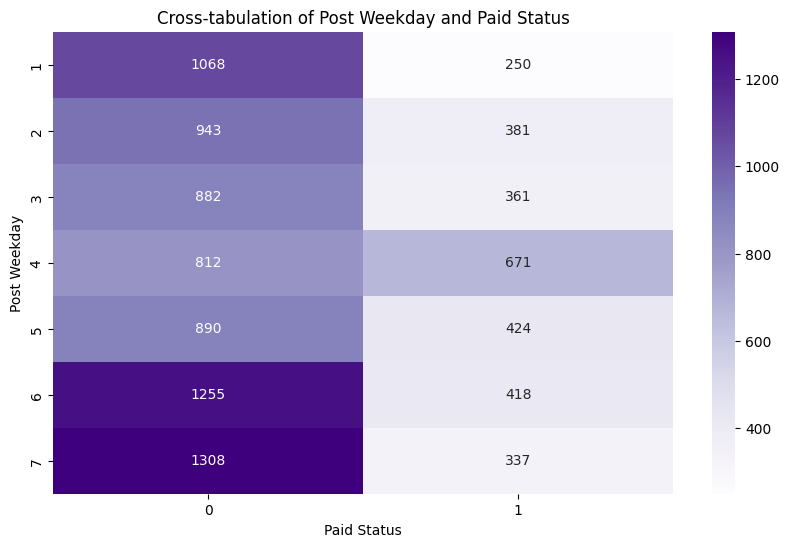

Chi-squared Test results:
Chi-squared Statistic: 334.75747419428967
P-value: 2.8833536226992753e-69
Degrees of Freedom: 6


In [ ]:
# Creating a cross-tabulation
crosstab = pd.crosstab(data['Post Weekday'], data['Paid'])

# Plotting the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap='Purples')
plt.title('Cross-tabulation of Post Weekday and Paid Status')
plt.xlabel('Paid Status')
plt.ylabel('Post Weekday')
plt.show()

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-squared Test results:\nChi-squared Statistic: {chi2}\nP-value: {p_value}\nDegrees of Freedom: {dof}")

**Observation**

- This result decisively rejects the null hypothesis that there is no association between the weekday and paid status, confirming a statistically significant relationship.

The chi-squared test strongly suggests that the day of the week is a significant factor in determining whether posts on Facebook are paid. This finding can be leveraged to refine social media marketing strategies, ensuring that paid content is optimally timed to achieve maximum visibility and engagement. If you need further interpretation or wish to explore additional analyses, feel free to ask!

# Third Dataset

In [ ]:
data = pd.read_csv('./ds3.csv')
data.head()

,Date,Platform,Type of Data,Records Exposed,Breach Method,Organization Response,Country,Sector,Data Sensitivity,Impact Level,Cost of Breach (USD),Time Until Discovery (days),Affected Users
0,2023-09-27,Tumblr,Photos/Videos,241170,Malware Attack,Data Notification to Users,Romania,Retail,Low,Moderate,276200,135,27683
1,2022-03-06,Instagram,Private Messages,185667,Insider Threat,Data Breach Investigation,Finland,Retail,Low,Severe,289052,323,27053
2,2019-08-05,Tumblr,Location Data,785154,Insider Threat,Enhanced Security Measures,Bermuda,Retail,High,Moderate,567738,240,16732
3,2021-09-09,LinkedIn,Photos/Videos,197495,Phishing,Data Breach Investigation,Burundi,Finance,Low,Minor,361768,48,25349
4,2021-07-13,Snapchat,User Credentials,362086,Malware Attack,Data Notification to Users,Gambia,Government,Low,Minor,253777,304,59192


In [ ]:
# Convert 'Date' column to datetime format (if not already done)
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and weekday features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month # January=1 and December = 12
data['Weekday'] = data['Date'].dt.weekday  # Monday=0, Sunday=6
data['Month_Name'] = data['Date'].dt.month_name()
data['Weekday_Name'] = data['Date'].dt.day_name()
data.head()

,Date,Platform,Type of Data,Records Exposed,Breach Method,Organization Response,Country,Sector,Data Sensitivity,Impact Level,Cost of Breach (USD),Time Until Discovery (days),Affected Users,Year,Month,Weekday,Month_Name,Weekday_Name
0,2023-09-27,Tumblr,Photos/Videos,241170,Malware Attack,Data Notification to Users,Romania,Retail,Low,Moderate,276200,135,27683,2023,9,2,September,Wednesday
1,2022-03-06,Instagram,Private Messages,185667,Insider Threat,Data Breach Investigation,Finland,Retail,Low,Severe,289052,323,27053,2022,3,6,March,Sunday
2,2019-08-05,Tumblr,Location Data,785154,Insider Threat,Enhanced Security Measures,Bermuda,Retail,High,Moderate,567738,240,16732,2019,8,0,August,Monday
3,2021-09-09,LinkedIn,Photos/Videos,197495,Phishing,Data Breach Investigation,Burundi,Finance,Low,Minor,361768,48,25349,2021,9,3,September,Thursday
4,2021-07-13,Snapchat,User Credentials,362086,Malware Attack,Data Notification to Users,Gambia,Government,Low,Minor,253777,304,59192,2021,7,1,July,Tuesday


In [ ]:
# Check for null values in each column
null_values = data.isnull().sum()

# Display the null values count for each column
print(null_values)

Date                           0
Platform                       0
Type of Data                   0
Records Exposed                0
Breach Method                  0
Organization Response          0
Country                        0
Sector                         0
Data Sensitivity               0
Impact Level                   0
Cost of Breach (USD)           0
Time Until Discovery (days)    0
Affected Users                 0
Year                           0
Month                          0
Weekday                        0
Month_Name                     0
Weekday_Name                   0
dtype: int64


In [ ]:
data.dtypes

Date                           datetime64[ns]
Platform                               object
Type of Data                           object
Records Exposed                         int64
Breach Method                          object
Organization Response                  object
Country                                object
Sector                                 object
Data Sensitivity                       object
Impact Level                           object
Cost of Breach (USD)                    int64
Time Until Discovery (days)             int64
Affected Users                          int64
Year                                    int32
Month                                   int32
Weekday                                 int32
Month_Name                             object
Weekday_Name                           object
dtype: object

In [ ]:
# Categorizing columns into numerical and categorical based on their data types
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print the categorized columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['Records Exposed', 'Cost of Breach (USD)', 'Time Until Discovery (days)', 'Affected Users']
Categorical columns: ['Platform', 'Type of Data', 'Breach Method', 'Organization Response', 'Country', 'Sector', 'Data Sensitivity', 'Impact Level', 'Month_Name', 'Weekday_Name']


In [ ]:
# Calculate summary statistics for the numerical columns
summary_statistics = data[numerical_columns].describe()

# Display the summary statistics
summary_statistics

,Records Exposed,Cost of Breach (USD),Time Until Discovery (days),Affected Users
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,497420.45910,502134.105300,181.873200,50430.471100
std,289703.26061,286635.229607,104.302536,28811.212517
min,1343.00000,1176.000000,1.000000,117.000000
25%,243612.75000,254112.000000,93.000000,25328.250000
50%,496756.00000,504655.500000,181.000000,50983.000000
75%,748710.00000,745099.250000,271.000000,75464.250000
max,999864.00000,999996.000000,365.000000,99992.000000


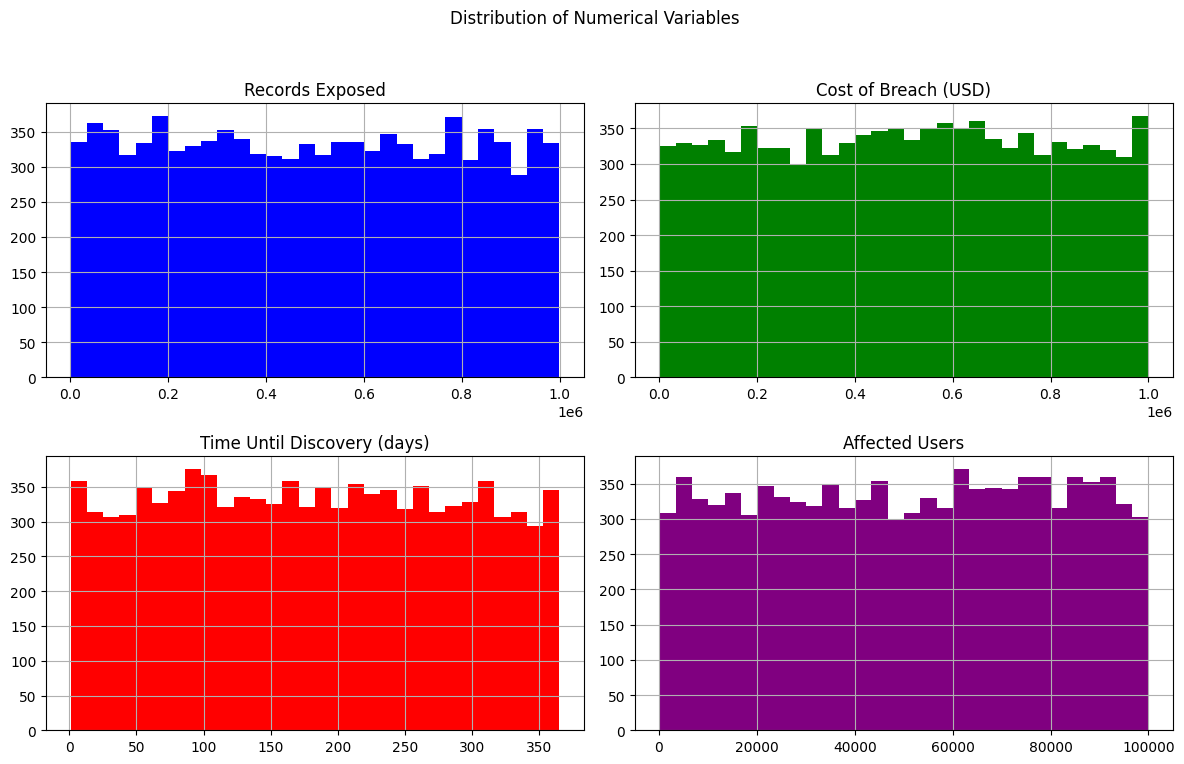

In [ ]:
# Creating histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Variables')

# Histogram for 'Records Exposed'
data['Records Exposed'].hist(ax=axes[0, 0], bins=30, color='blue')
axes[0, 0].set_title('Records Exposed')

# Histogram for 'Cost of Breach (USD)'
data['Cost of Breach (USD)'].hist(ax=axes[0, 1], bins=30, color='green')
axes[0, 1].set_title('Cost of Breach (USD)')

# Histogram for 'Time Until Discovery (days)'
data['Time Until Discovery (days)'].hist(ax=axes[1, 0], bins=30, color='red')
axes[1, 0].set_title('Time Until Discovery (days)')

# Histogram for 'Affected Users'
data['Affected Users'].hist(ax=axes[1, 1], bins=30, color='purple')
axes[1, 1].set_title('Affected Users')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From the histograms generated, here are some key observations for each variable:

__Records Exposed:__

  - The distribution is skewed to the right, indicating that most breaches expose a smaller number of records, but there are a few cases with a very large number of records exposed.
  - This suggests that while most breaches might be contained, a few breaches are exceptionally severe.

__Cost of Breach (USD):__

  - Similar to the 'Records Exposed' distribution, the cost of breaches is also right-skewed.
  - Most breaches result in lower costs, but there are occasional breaches that are extremely costly, possibly correlating with the severity of data exposed or the impact on the affected company.

__Time Until Discovery (days):__

  - This variable also shows a right-skewed distribution, indicating that most breaches are discovered within a shorter timeframe, but some take much longer to detect.
  - The longer detection times could be indicative of more sophisticated breaches or lower security vigilance.

__Affected Users:__

  - Again, a right-skewed distribution is evident, where most breaches affect fewer users, but there are breaches that affect a large number of users.
  - This pattern highlights the variance in the scale of breaches, affecting from a few to millions of users.

These distributions indicate that while the typical breach might be of a manageable scale, there exist outliers with extensive damage either in terms of records exposed, cost, detection time, or user impact. Understanding these outliers could be key to improving security measures and response strategies.

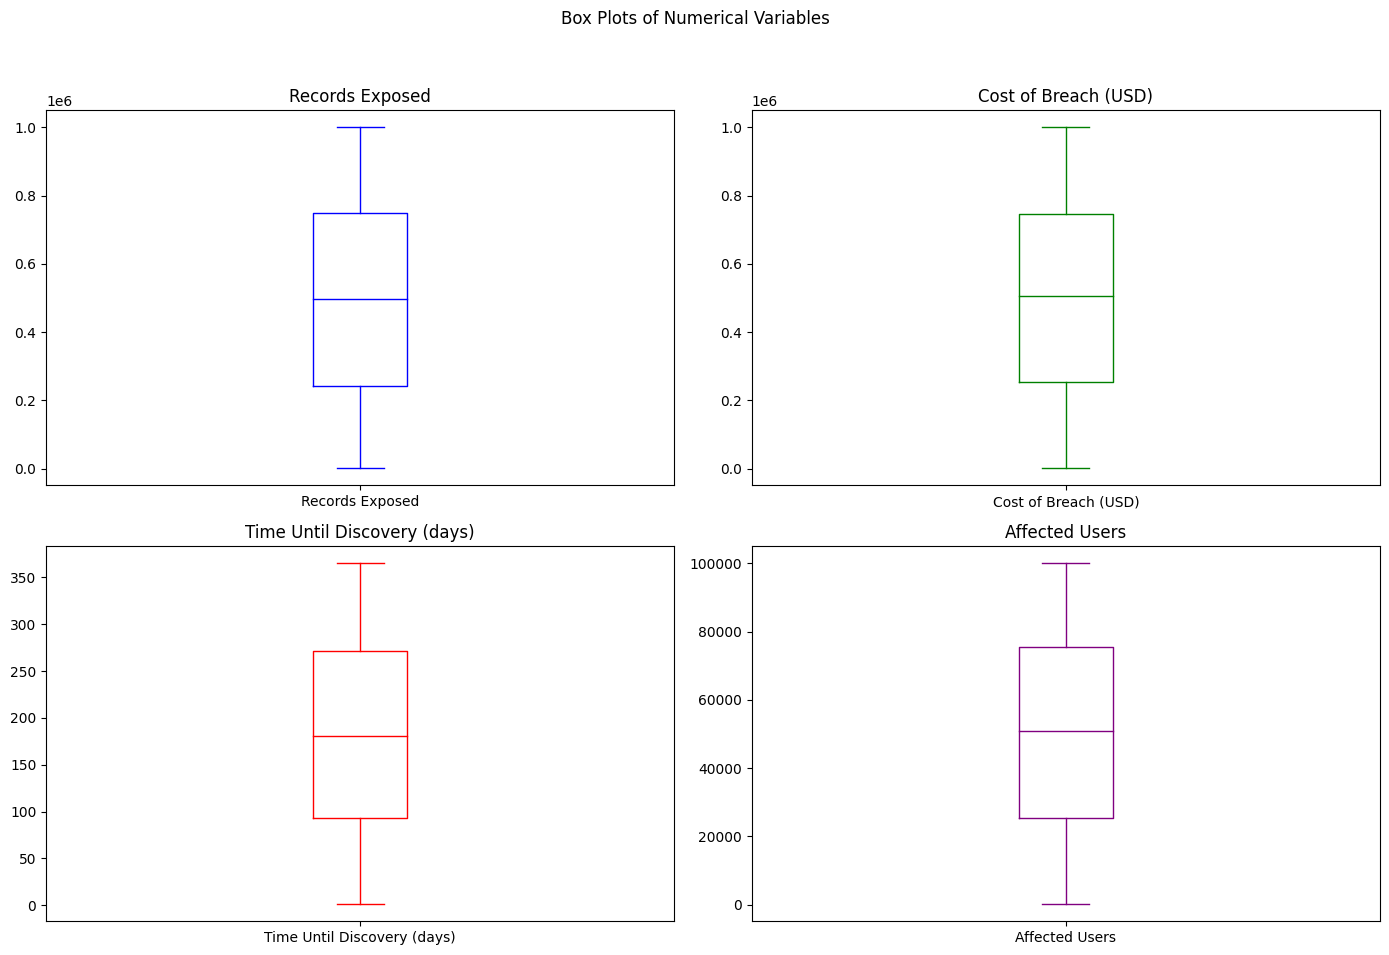

In [ ]:
# Creating box plots for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plots of Numerical Variables')

# Box plot for 'Records Exposed'
data['Records Exposed'].plot(kind='box', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Records Exposed')

# Box plot for 'Cost of Breach (USD)'
data['Cost of Breach (USD)'].plot(kind='box', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Cost of Breach (USD)')

# Box plot for 'Time Until Discovery (days)'
data['Time Until Discovery (days)'].plot(kind='box', ax=axes[1, 0], color='red')
axes[1, 0].set_title('Time Until Discovery (days)')

# Box plot for 'Affected Users'
data['Affected Users'].plot(kind='box', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Affected Users')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Categorical Data Analysis:

In [ ]:
# Ensure the 'Month' column is of categorical type with the correct order
data['Month_Name'] = pd.Categorical(data['Month_Name'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Ensure the 'Weekday' column is of categorical type with the correct order
data['Weekday_Name'] = pd.Categorical(data['Weekday_Name'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], ordered=True)

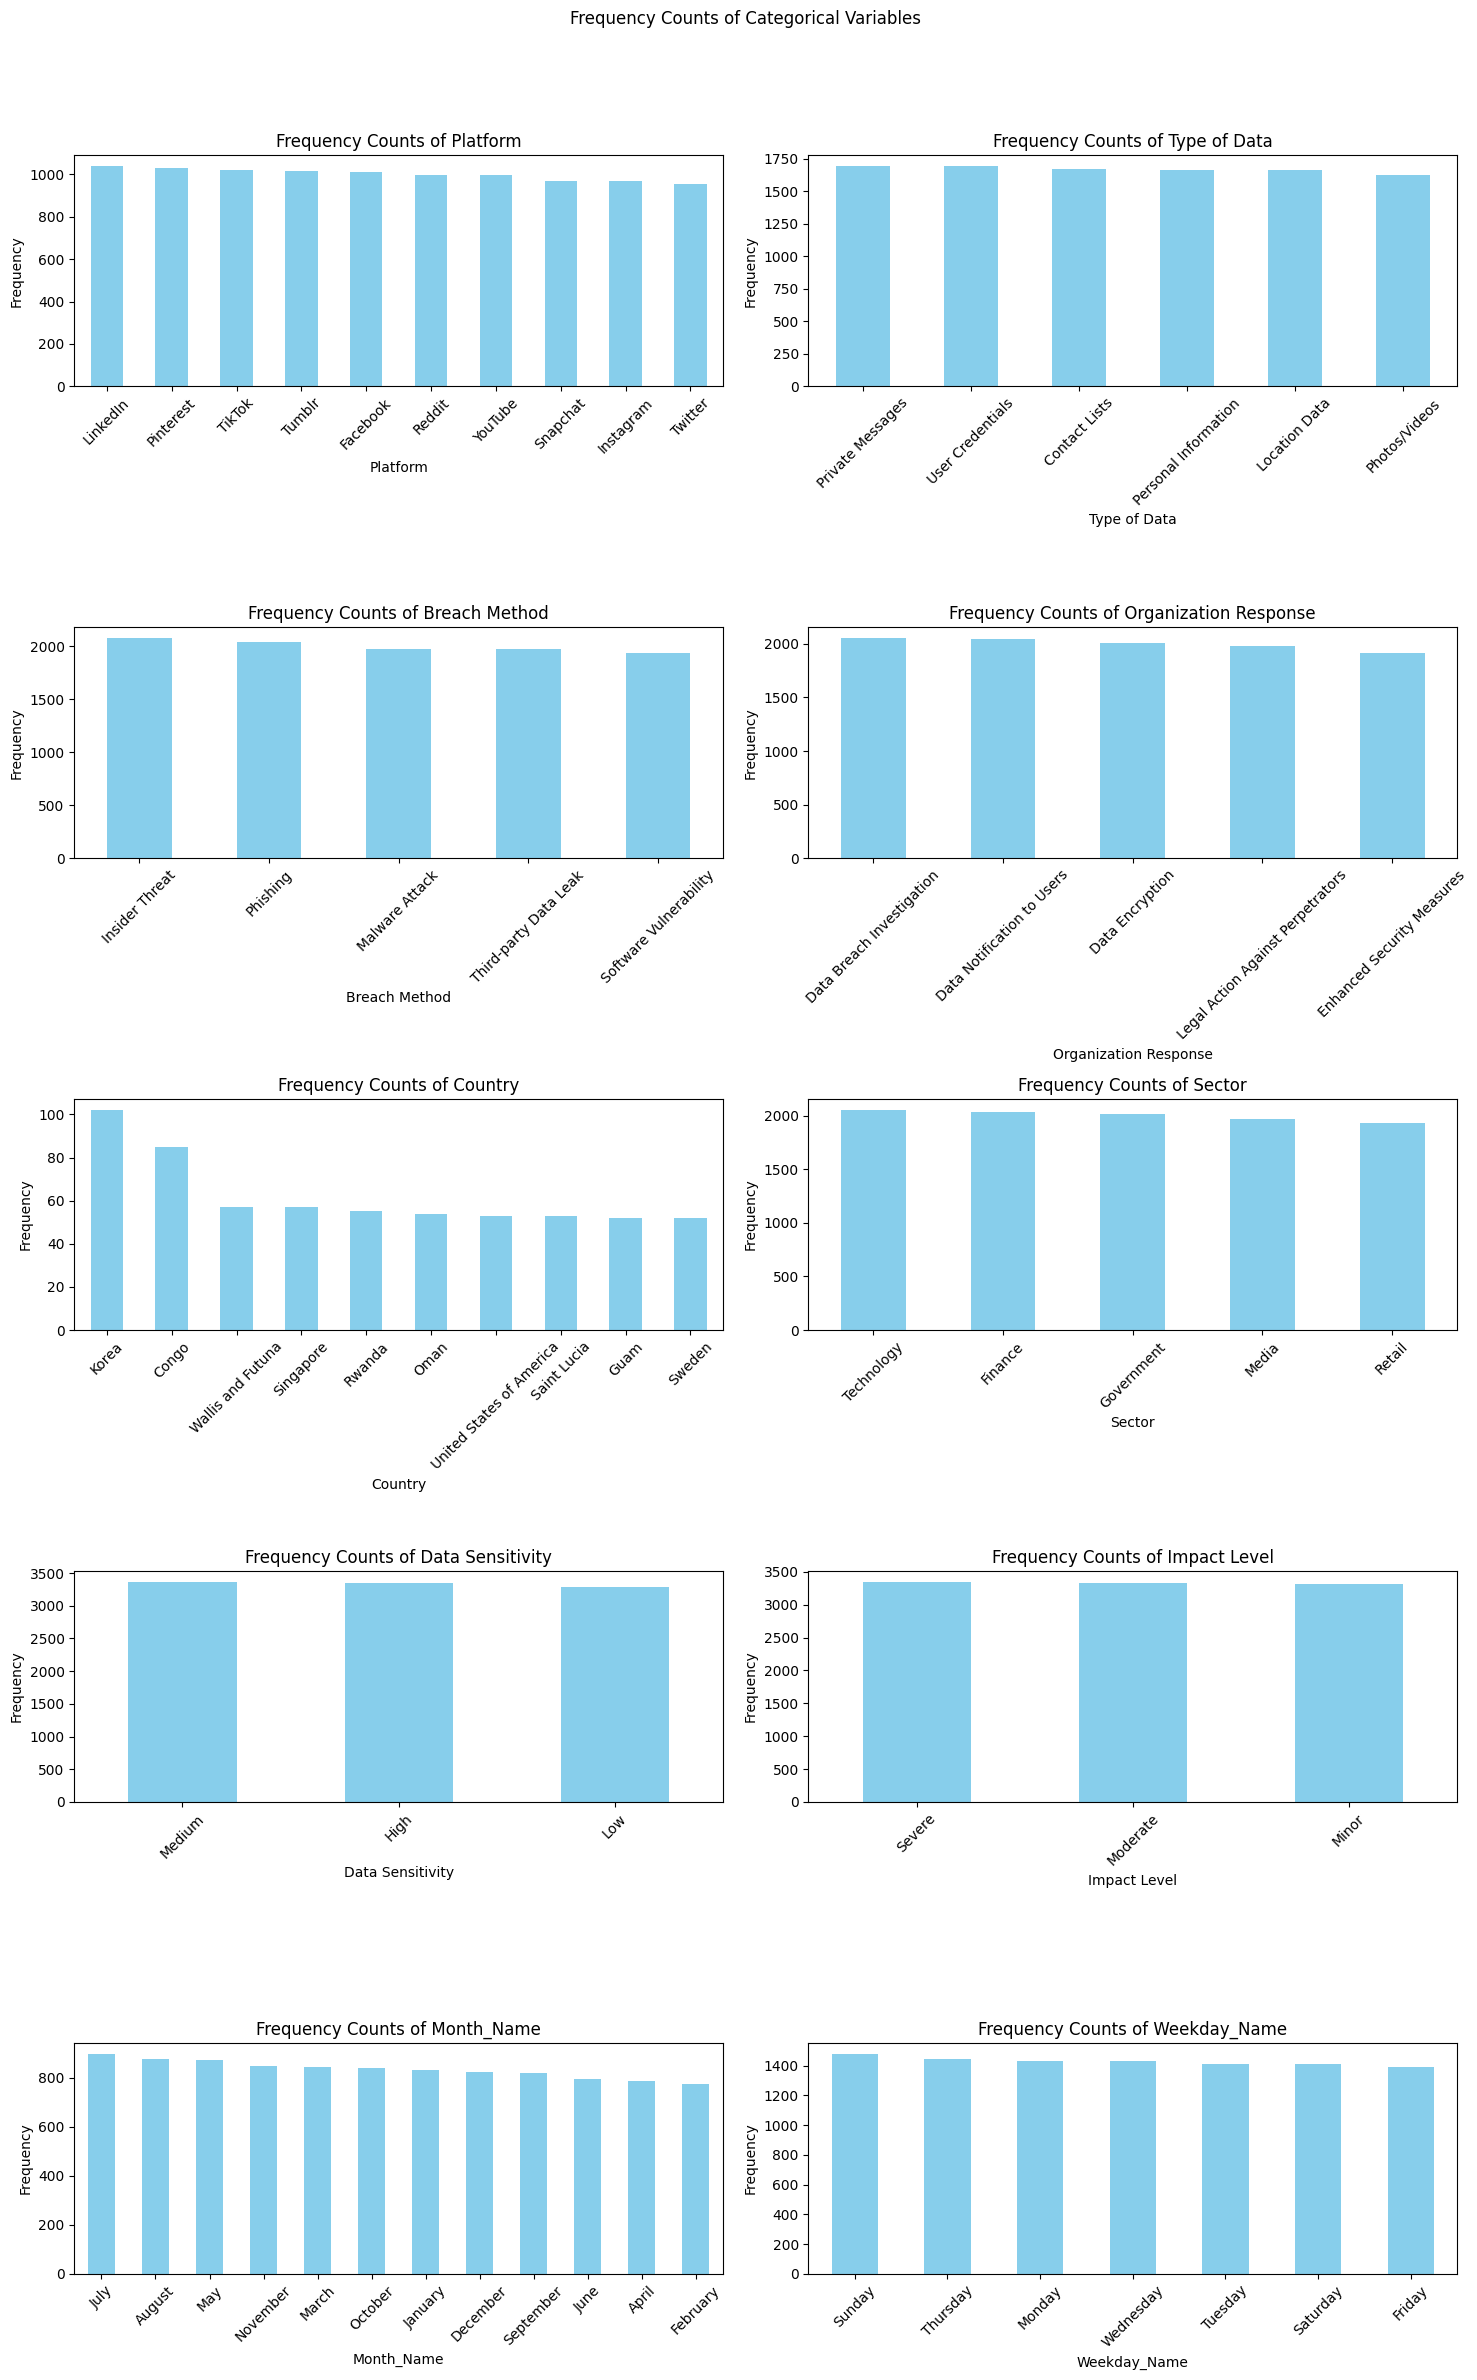

In [ ]:
# Number of rows and columns for subplots
num_rows = (len(categorical_columns) + 1) // 2  # Adding 1 to round up
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Frequency Counts of Categorical Variables')

# Flatten axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    if column == 'Country':
        top_countries = data[column].value_counts().nlargest(10)
        top_countries.plot(kind='bar', ax=ax, color='skyblue')
    elif column == 'Date':
        continue  # Skip date plot
    else:
        data[column].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Frequency Counts of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplot
for i in range(len(categorical_columns), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Time Series Analysis:

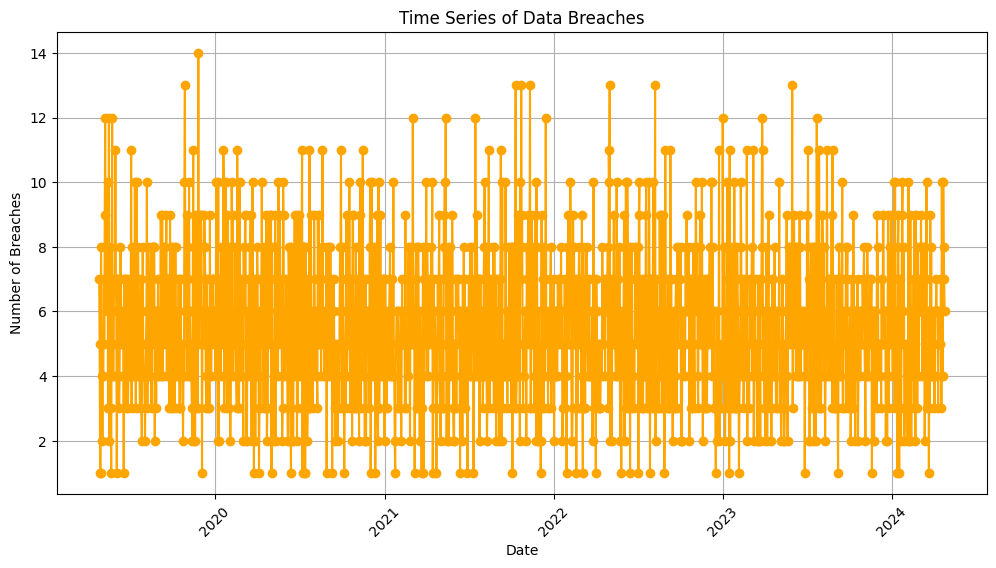

In [ ]:
# Convert 'Date' column to datetime format (if not already done)
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date and count the number of breaches for each date
breach_counts_by_date = data['Date'].value_counts().sort_index()

# Plot time series of data breaches over time
plt.figure(figsize=(12, 6))
plt.plot(breach_counts_by_date.index, breach_counts_by_date.values, marker='o', color='orange')
plt.title('Time Series of Data Breaches')
plt.xlabel('Date')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

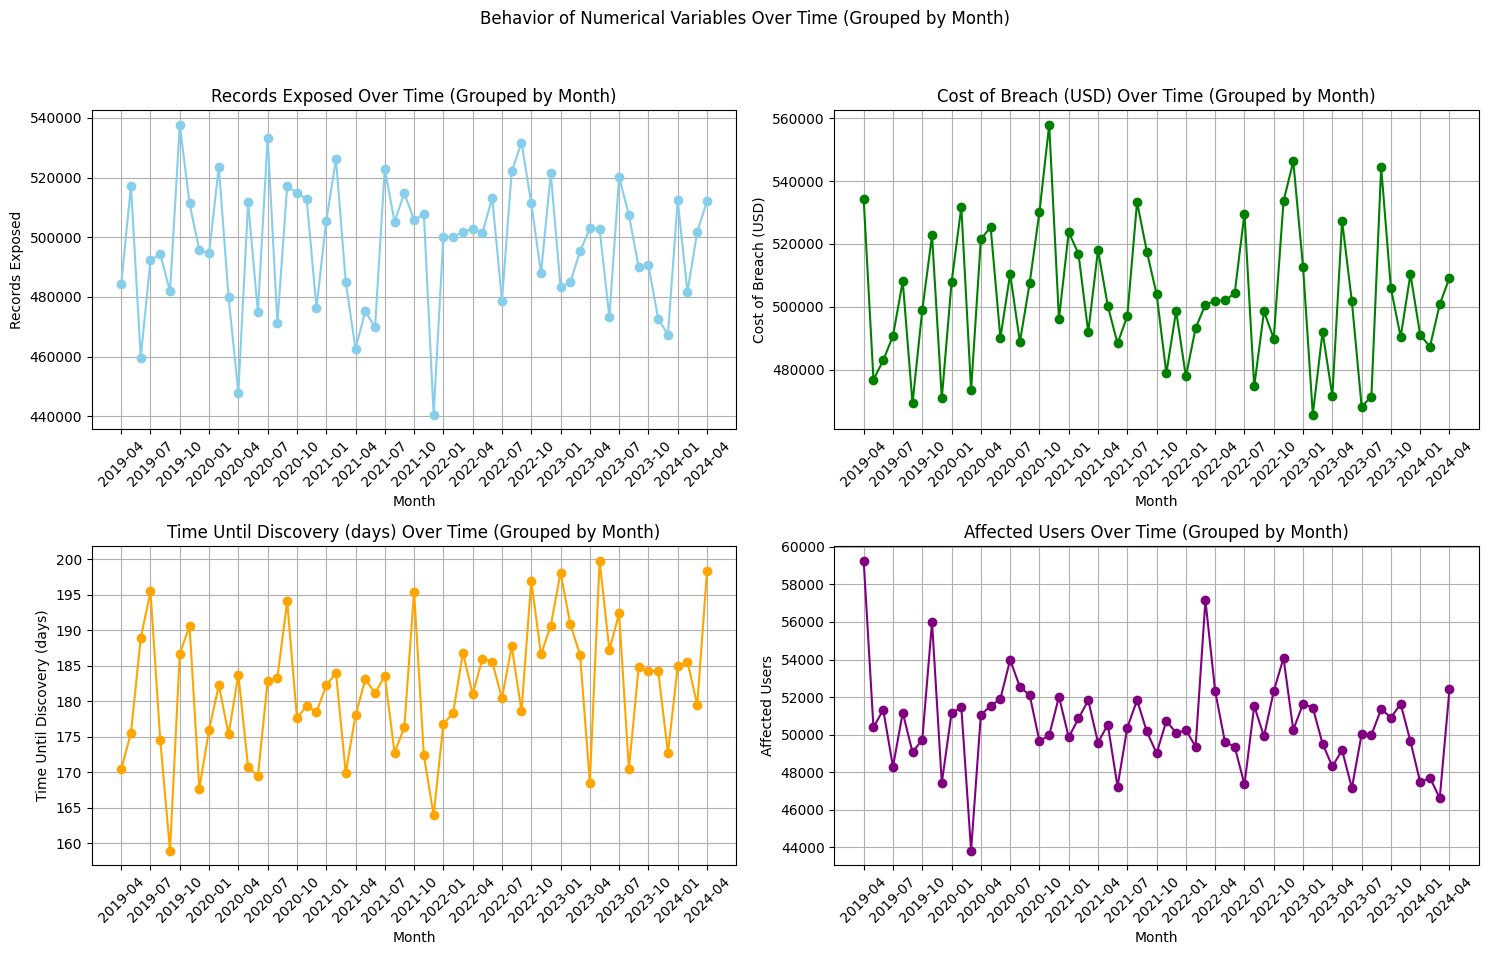

In [ ]:
import numpy as np

# Group data by month and calculate mean for each numerical column
monthly_data = data.groupby(data['Date'].dt.to_period('M'))[numerical_columns].mean()

# Convert PeriodIndex to strings representing month names
monthly_data.index = monthly_data.index.strftime('%Y-%m')

# Number of rows and columns for subplots
num_rows = (len(numerical_columns) + 1) // 2  # Adding 1 to round up
num_cols = 2

# Define colors for each numerical column
colors = ['skyblue', 'green', 'orange', 'purple']

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Behavior of Numerical Variables Over Time (Grouped by Month)')

# Flatten axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot each numerical column against month with different colors
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.plot(monthly_data.index, monthly_data[column], marker='o', linestyle='-', color=colors[i % len(colors)])
    ax.set_title(f'{column} Over Time (Grouped by Month)')
    ax.set_xlabel('Month')
    ax.set_ylabel(column)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

    # Set x-axis ticks to display quarterly dates
    quarterly_dates_index = np.arange(0, len(monthly_data), 3)
    quarterly_dates = monthly_data.index[quarterly_dates_index]
    ax.set_xticks(quarterly_dates_index)
    ax.set_xticklabels(quarterly_dates)

# Remove any empty subplot
for i in range(len(numerical_columns), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Correlation Analysis:

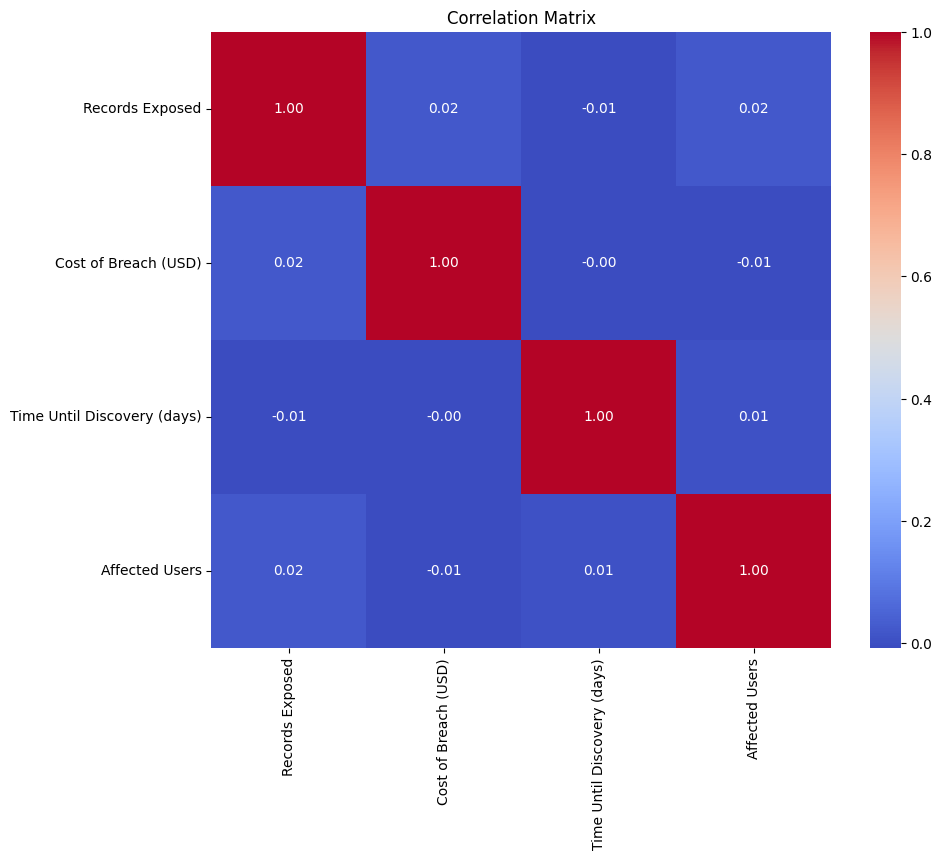

In [ ]:
# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Bivariate Analysis:

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create an empty dictionary to store all p-values
p_values_dict = {}

# Assume 'categorical_columns' contains all categorical variables in your dataset
for target_variable in categorical_columns:
    print(f"Testing independence with '{target_variable}' as the target variable:")
    independence_scores = []
    for predictor_variable in categorical_columns:
        # Create a contingency table of the target variable and the predictor variable
        contingency_table = pd.crosstab(data[target_variable], data[predictor_variable])

        # Perform chi-square test of independence
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

        # Append the p-value to the independence_scores list
        independence_scores.append(p_value)

    # Store the p-values for the target variable
    p_values_dict[target_variable] = independence_scores

# Create a DataFrame from the p-values dictionary
p_values_df = pd.DataFrame(p_values_dict, index=categorical_columns)

p_values_df

Testing independence with 'Platform' as the target variable:
Testing independence with 'Type of Data' as the target variable:
Testing independence with 'Breach Method' as the target variable:
Testing independence with 'Organization Response' as the target variable:
Testing independence with 'Country' as the target variable:
Testing independence with 'Sector' as the target variable:
Testing independence with 'Data Sensitivity' as the target variable:
Testing independence with 'Impact Level' as the target variable:
Testing independence with 'Month_Name' as the target variable:
Testing independence with 'Weekday_Name' as the target variable:


,Platform,Type of Data,Breach Method,Organization Response,Country,Sector,Data Sensitivity,Impact Level,Month_Name,Weekday_Name
Platform,0.000000,0.035063,0.494901,0.859806,0.179861,0.123027,0.316697,0.045962,0.694600,0.065076
Type of Data,0.035063,0.000000,0.591268,0.292604,0.369510,0.967094,0.471836,0.474649,0.248533,0.289130
Breach Method,0.494901,0.591268,0.000000,0.131274,0.471413,0.885793,0.813047,0.257451,0.589919,0.691606
Organization Response,0.859806,0.292604,0.131274,0.000000,0.799440,0.740079,0.002580,0.902419,0.646687,0.959154
Country,0.179861,0.369510,0.471413,0.799440,0.000000,0.537181,0.296140,0.686186,0.917496,0.315887
Sector,0.123027,0.967094,0.885793,0.740079,0.537181,0.000000,0.215077,0.556202,0.581217,0.936040
Data Sensitivity,0.316697,0.471836,0.813047,0.002580,0.296140,0.215077,0.000000,0.487537,0.249733,0.222976
Impact Level,0.045962,0.474649,0.257451,0.902419,0.686186,0.556202,0.487537,0.000000,0.350725,0.974709
Month_Name,0.694600,0.248533,0.589919,0.646687,0.917496,0.581217,0.249733,0.350725,0.000000,0.394907
Weekday_Name,0.065076,0.289130,0.691606,0.959154,0.315887,0.936040,0.222976,0.974709,0.394907,0.000000


In [ ]:
# Convert the DataFrame to contain only numeric values
numeric_df = p_values_df.select_dtypes(include=['number'])

# Find the top 5 maximum values in the numeric DataFrame
top_5_max_values = numeric_df.stack().nlargest(6)

# Print the result
print("Top 5 Maximum Values:")
print(top_5_max_values)

# Extract the corresponding rows and columns for the top 5 maximum values
corresponding_rows = [index[0] for index in top_5_max_values.index]
corresponding_cols = [index[1] for index in top_5_max_values.index]

# Print the corresponding rows and columns
print("\nCorresponding Rows:")
print(corresponding_rows)
print("\nCorresponding Columns:")
print(corresponding_cols)


Top 5 Maximum Values:
Impact Level           Weekday_Name             0.974709
Weekday_Name           Impact Level             0.974709
Type of Data           Sector                   0.967094
Sector                 Type of Data             0.967094
Weekday_Name           Organization Response    0.959154
Organization Response  Weekday_Name             0.959154
dtype: float64

Corresponding Rows:
['Impact Level', 'Weekday_Name', 'Type of Data', 'Sector', 'Weekday_Name', 'Organization Response']

Corresponding Columns:
['Weekday_Name', 'Impact Level', 'Sector', 'Type of Data', 'Organization Response', 'Weekday_Name']


In [ ]:
ind_categorical_cols = set(corresponding_rows + corresponding_cols)
ind_categorical_cols

{'Impact Level',
 'Organization Response',
 'Sector',
 'Type of Data',
 'Weekday_Name'}

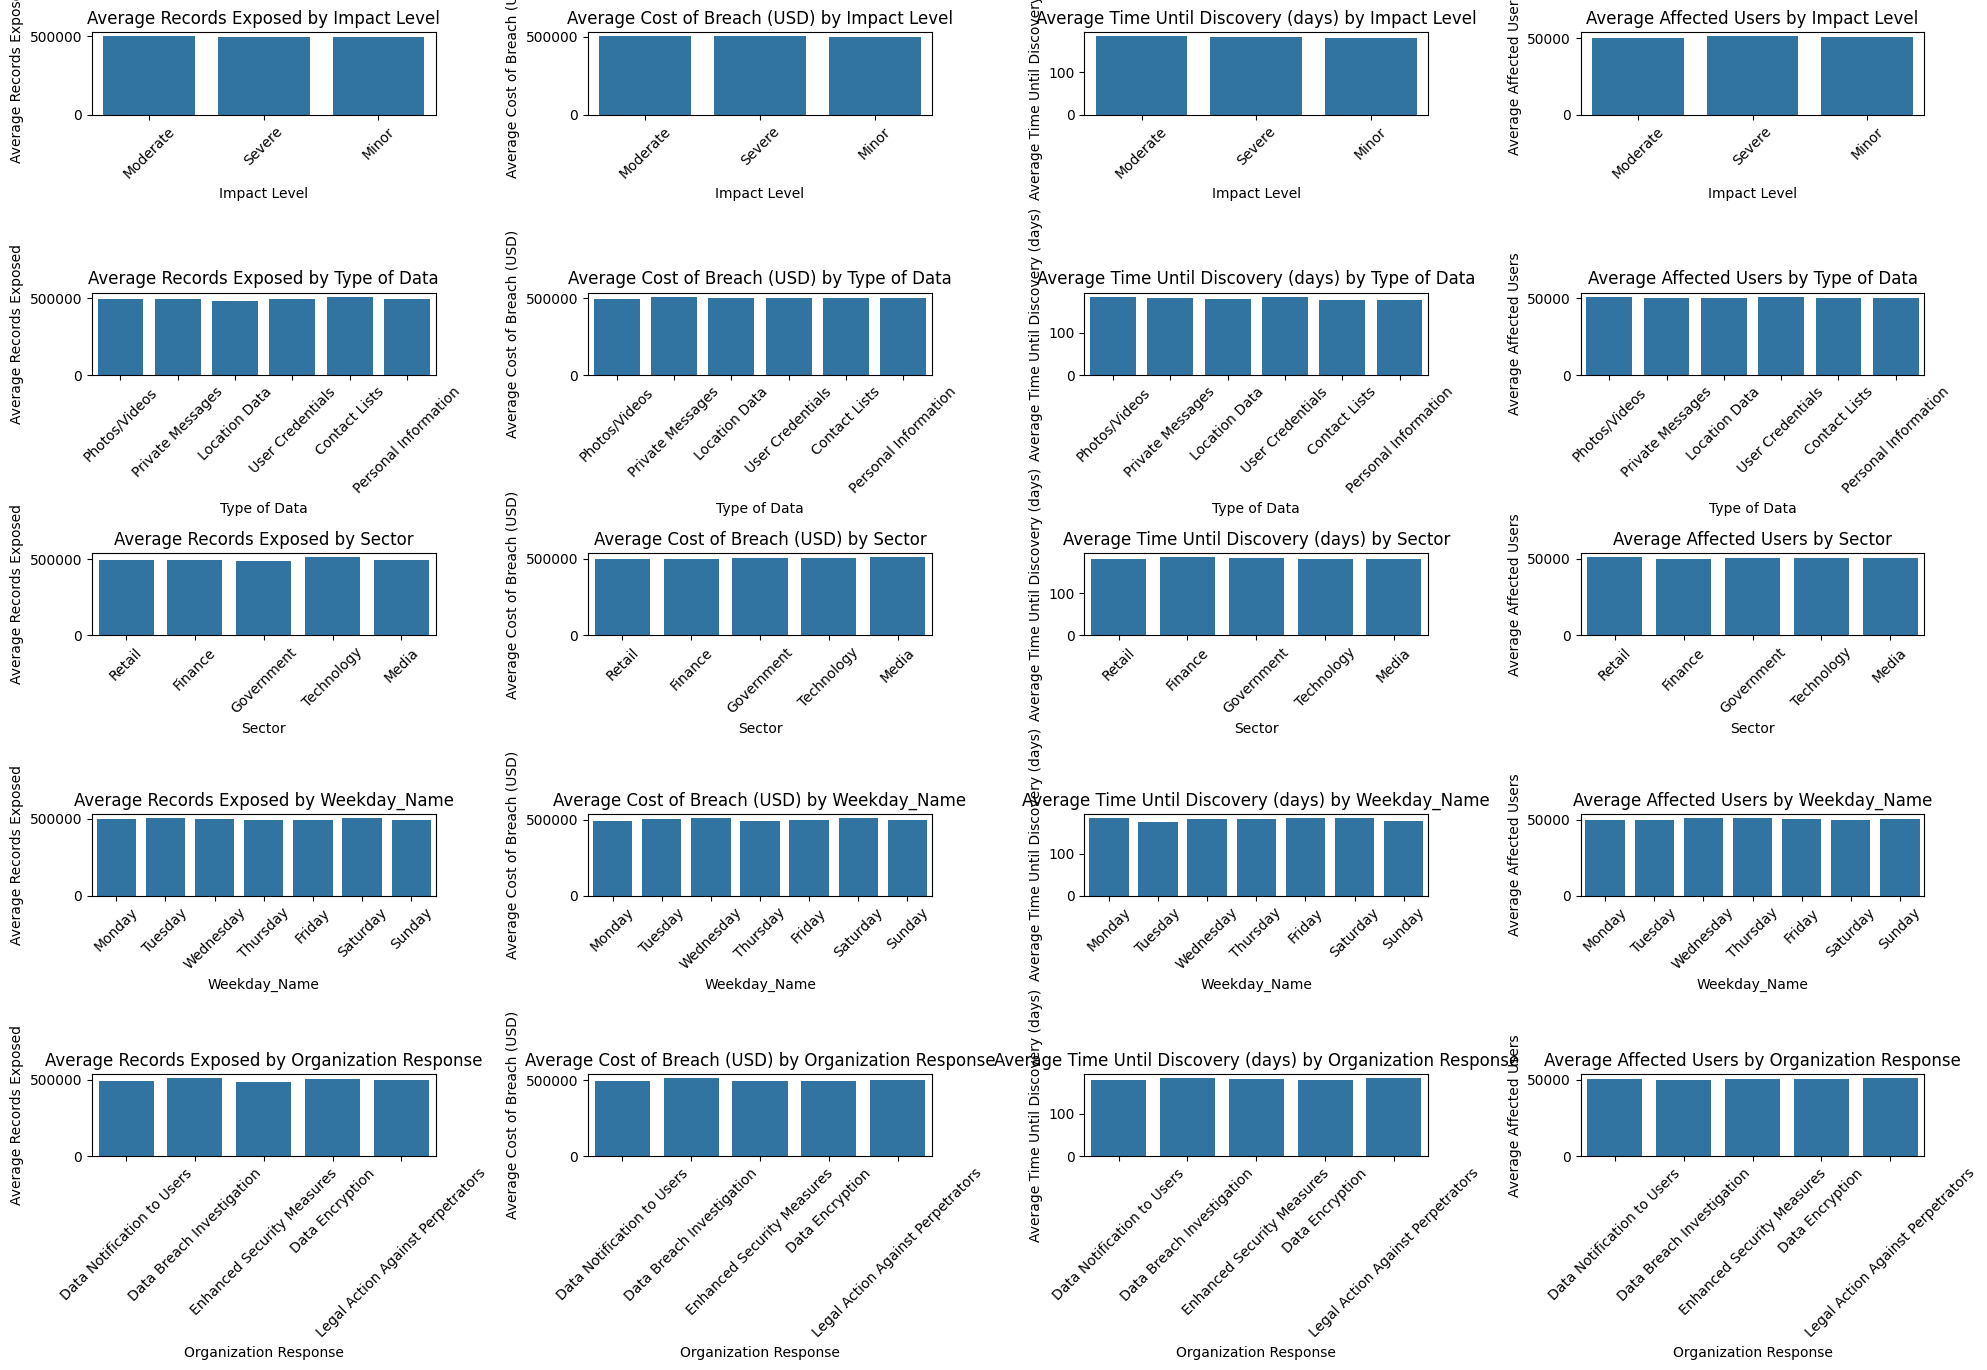

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for the grid
num_rows = len(ind_categorical_cols)
num_cols = len(numerical_columns)

# Create subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15), sharex=False, sharey=False)

# Plot each combination of categorical variable and numerical variable
for i, categorical_column in enumerate(ind_categorical_cols):
    for j, numerical_column in enumerate(numerical_columns):
        ax = axes[i, j]  # Get the correct axis for this subplot
        sns.barplot(x=categorical_column, y=numerical_column, data=data, ci=None, ax=ax)
        ax.set_title(f'Average {numerical_column} by {categorical_column}')
        ax.set_xlabel(categorical_column)
        ax.set_ylabel(f'Average {numerical_column}')
        ax.tick_params(axis='x', rotation=45)  # Increase rotation angle for x-axis labels

# Remove any empty subplot
for i in range(num_rows):
    for j in range(num_cols, len(numerical_columns)):
        fig.delaxes(axes[i, j])

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()